#### Loose Diamond Price Prediction

In [1]:
#Import package

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostRegressor

from dmba import regressionSummary
from dmba import backward_elimination, forward_selection, stepwise_selection, exhaustive_search

from itertools import combinations

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#Neural Network
from sklearn.neural_network import MLPRegressor

#Association Rules and Clustering
from pathlib import Path
import heapq
from collections import defaultdict
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Regression Based Forecasting
import math
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

#LSTM Neural Network
from numpy import array, split
from math import sqrt
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

C:\Users\deejd\anaconda3\Lib\site-packages\botocore\utils.py:15: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
C:\Users\deejd\anaconda3\Lib\site-packages\botocore\httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


In [2]:
#Load & display diamond dataset

diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#Display data type

diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
#Display data describe

diamond_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
#Drop 1st column of dataset, due to it's no. of row & unnamed column

diamond_df = diamond_df.drop('Unnamed: 0', axis = 1)

In [6]:
#Dropping dimentionless diamonds -- since its dimension is zero, there're faulty values.

diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

diamond_df.shape

(53920, 10)

In [7]:
#Create new column for diamond size -- size

diamond_df['size'] = diamond_df['x'] * diamond_df['y'] * diamond_df['z'] 

In [8]:
#Create a list of column names excluding 'price'
columns_without_price = [col for col in diamond_df.columns if col != 'price']

#Rearrange columns to move 'price' to the last position
new_column_order = columns_without_price + ['price']

#Create a new DataFrame with columns arranged in the new order
diamond_df = diamond_df[new_column_order]

diamond_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,size,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,38.202030,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,34.505856,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,38.076885,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,46.724580,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,51.917250,335


In [9]:
#Display statistics value -- after removing dimensional diamonds equal 0 out of dataset

diamond_df.describe()

,carat,depth,table,x,y,z,size,price
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,5.731627,5.734887,3.540046,129.897567,3930.993231
std,0.473795,1.432331,2.234064,1.119423,1.140126,0.702530,78.219789,3987.280446
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,31.707984,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,65.189759,949.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,114.840180,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,170.846415,5323.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,3840.598060,18823.000000


### Visualizing dataset to analyze pattern in dataset

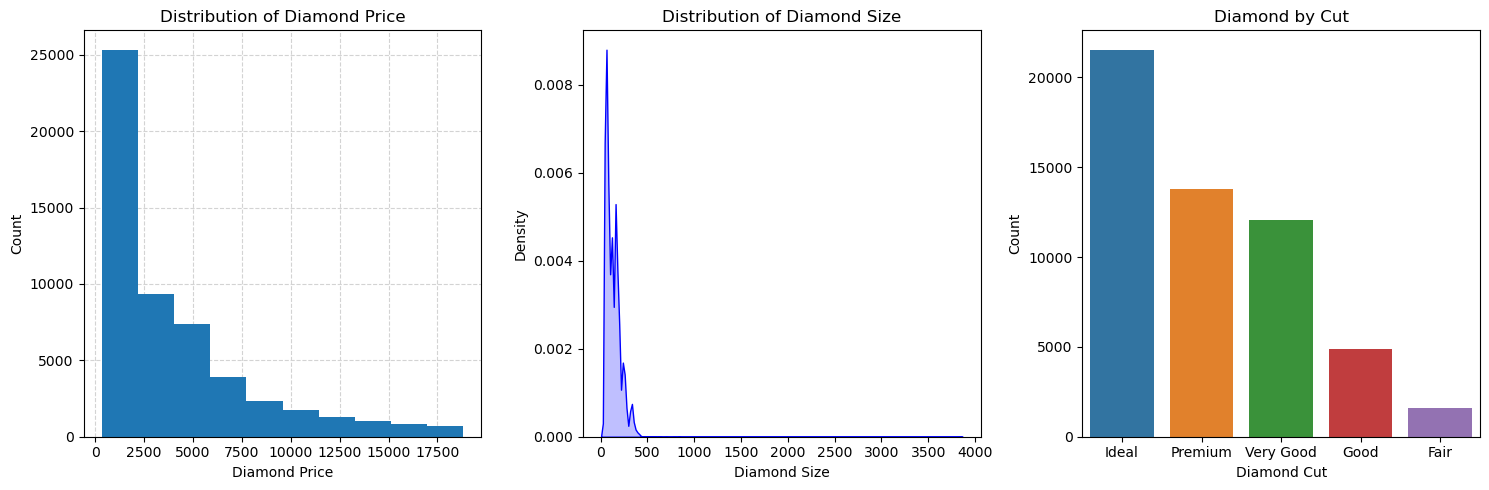

In [10]:
# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First subplot: Distribution of Diamond Price
axs[0].hist(diamond_df.price)
axs[0].set_axisbelow(True)
axs[0].grid(which='major', color='lightgrey', linestyle='--')
axs[0].set_xlabel('Diamond Price')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Diamond Price')

# Second subplot: Distribution of Diamond Size
sns.kdeplot(diamond_df['size'], fill=True, color="b", ax=axs[1])
axs[1].set_xlabel("Diamond Size")
axs[1].set_ylabel("Density")
axs[1].set_title("Distribution of Diamond Size")

# Third subplot: No. of diamonds by cut
custom_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
sns.countplot(data=diamond_df, x='cut', order=custom_order, ax=axs[2])
axs[2].set_xlabel("Diamond Cut")
axs[2].set_ylabel("Count")
axs[2].set_title("Diamond by Cut")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

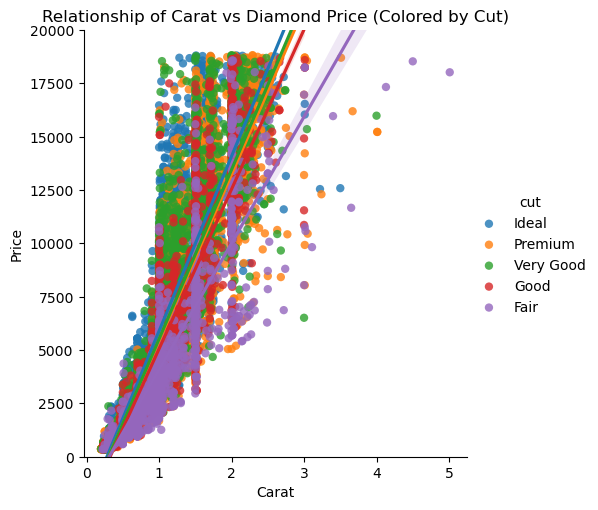

In [11]:
#Analyze the relationship between the carat and the diamond price (colored by cut)

#Define the order of the legend labels (cuts)
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#Use lmplot with hue_order to control the order of the legend labels
sns.lmplot(data = diamond_df, x = 'carat', y = 'price', hue = 'cut', hue_order = cut_order, scatter_kws = {"edgecolor": 'none'})
plt.xlabel('Carat')
plt.ylabel('Price')
plt.ylim(0, 20000)

plt.title('Relationship of Carat vs Diamond Price (Colored by Cut)')
plt.show()

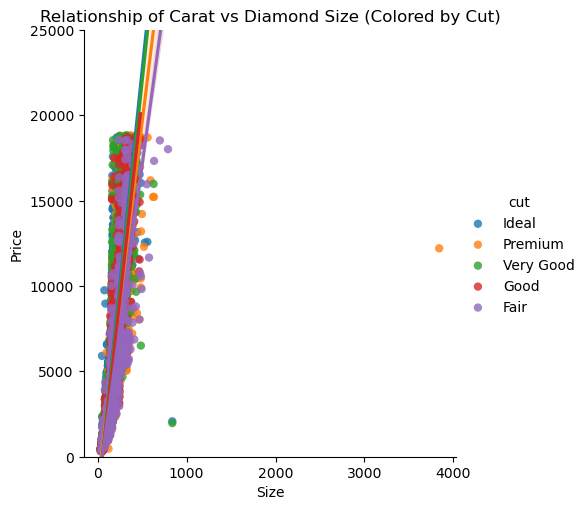

In [12]:
#Analyze the relationship between the diamond size and price (colored by cut)

#Define the order of the legend labels (cuts)
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#Use lmplot with hue_order to control the order of the legend labels
sns.lmplot(data=diamond_df, x='size', y='price', hue='cut', hue_order=cut_order, scatter_kws={"edgecolor": 'none'})
plt.xlabel('Size')
plt.ylabel('Price')
plt.ylim(0, 25000)

plt.title('Relationship of Carat vs Diamond Size (Colored by Cut)')
plt.show()

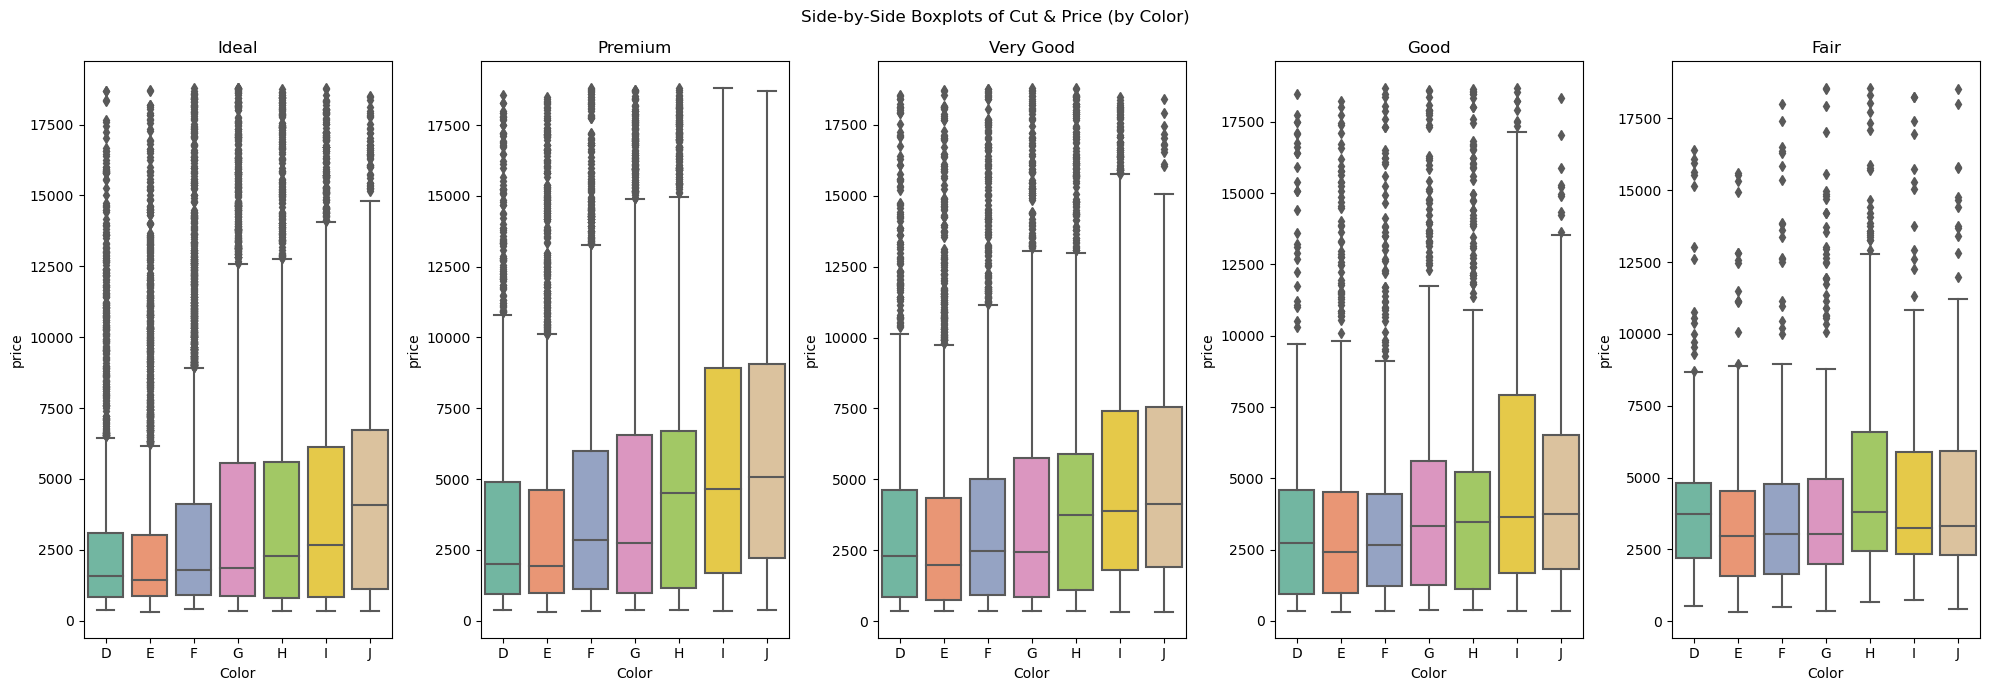

In [13]:
#Display side-by-side boxplots -- Cut & Price (by color)

#Define cuts
cuts = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#Order colors
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

#Create side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(cuts), figsize=(20, 7))
colors = sns.color_palette("Set2")

#Iterate through cuts
for i, cut in enumerate(cuts):
    #Filter data for each cut
    cut_data = diamond_df[diamond_df['cut'] == cut]
    
    #Create boxplot for each cut
    sns.boxplot(data=cut_data, x='color', y='price', ax=axes[i], palette=colors, order=color_order)
    axes[i].set_title(cut)
    axes[i].set_xlabel('Color')

plt.suptitle('Side-by-Side Boxplots of Cut & Price (by Color)')
plt.tight_layout()
plt.show()

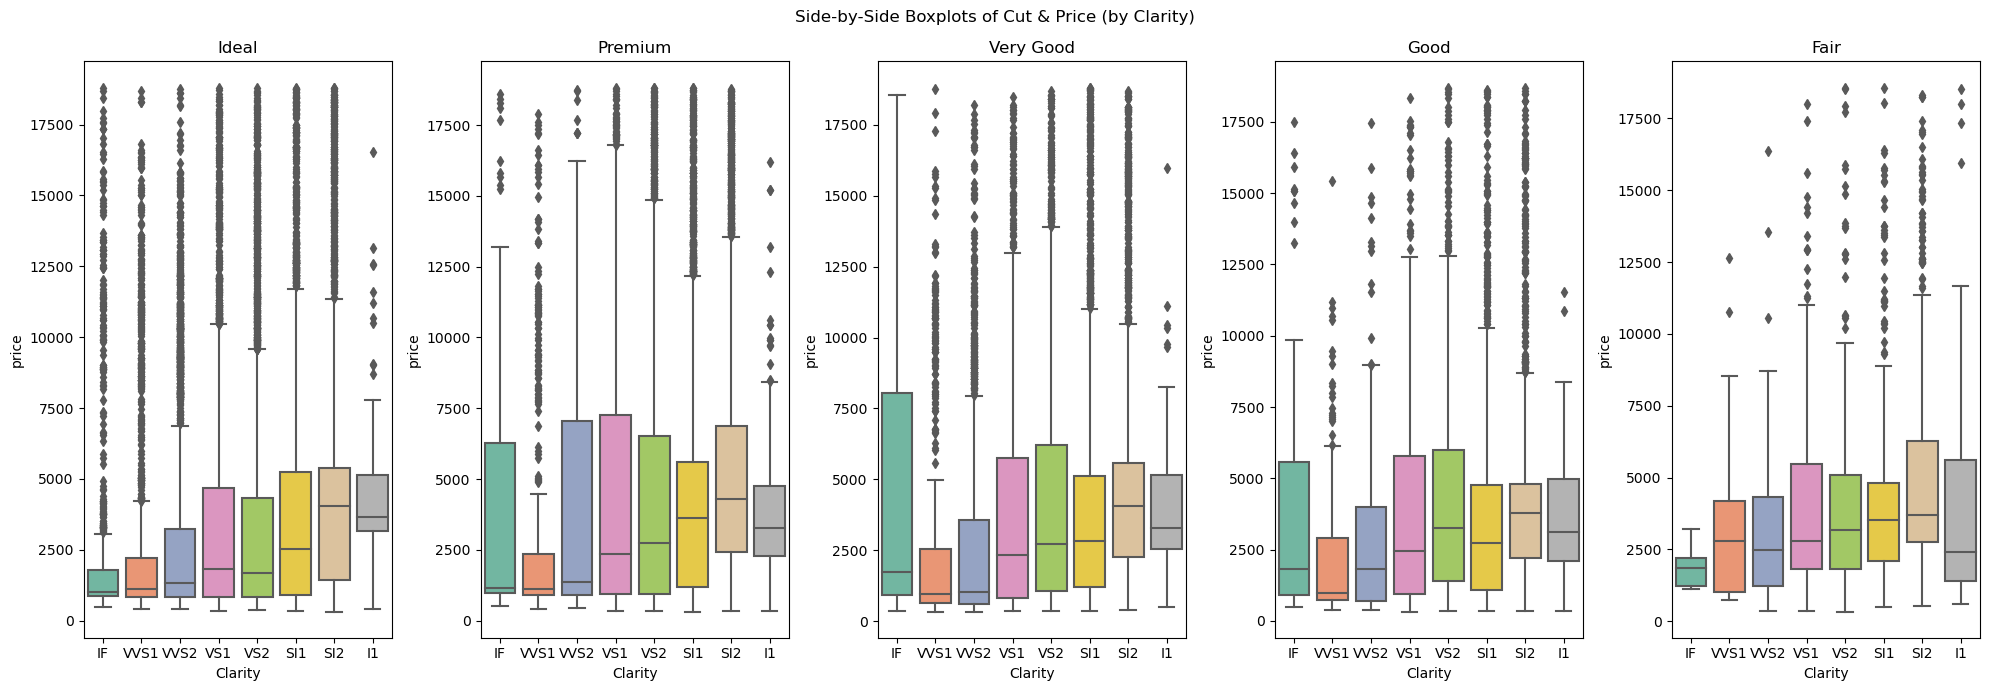

In [14]:
#Display side-by-side boxplots -- Cut & Price (by clarity)

#Define cuts
cuts = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#Order clarity
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

#Create side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(cuts), figsize=(20, 7))
colors = sns.color_palette("Set2")

#Iterate through cuts
for i, cut in enumerate(cuts):
    #Filter data for each cut
    cut_data = diamond_df[diamond_df['cut'] == cut]
    
    #Create boxplot for each cut
    sns.boxplot(data=cut_data, x='clarity', y='price', ax=axes[i], palette=colors, order=clarity_order)
    axes[i].set_title(cut)
    axes[i].set_xlabel('Clarity')

plt.suptitle('Side-by-Side Boxplots of Cut & Price (by Clarity)')
plt.tight_layout()
plt.show()

In [15]:
# Create a LabelEncoder for each column

#Copy dataset to diamondEncode_df
diamondEncode_df = diamond_df.copy()

# Specify the columns to be label encoded
encode_columns = ['cut', 'color', 'clarity']

label_encoders = {}

for column in encode_columns:
    if column in diamondEncode_df.columns:  #Check if the column exists
        label_encoders[column] = LabelEncoder()
        diamondEncode_df[column] = label_encoders[column].fit_transform(diamondEncode_df[column])
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Print the updated DataFrame information
diamondEncode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int32  
 2   color    53920 non-null  int32  
 3   clarity  53920 non-null  int32  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   x        53920 non-null  float64
 7   y        53920 non-null  float64
 8   z        53920 non-null  float64
 9   size     53920 non-null  float64
 10  price    53920 non-null  int64  
dtypes: float64(7), int32(3), int64(1)
memory usage: 4.3 MB


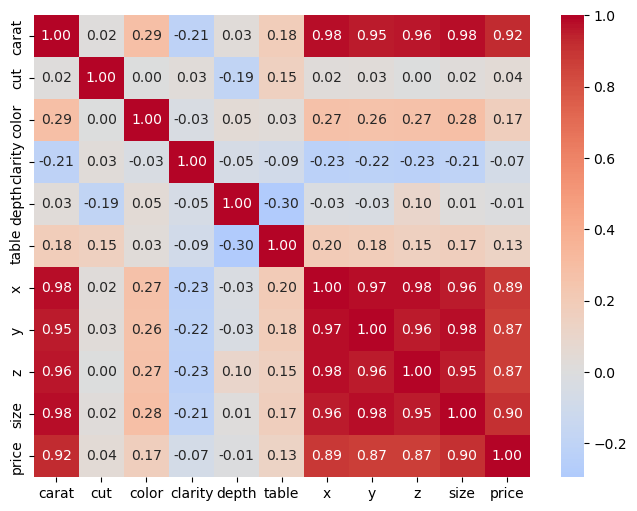

In [16]:
#Display correlation -- heatmap
corr = diamondEncode_df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", center = 0, ax = ax)
plt.show()

### Data pre-processing

In [17]:
#Convert column: cut, color, and clarity from categorical to numerical data

diamond_df['cut'] = diamond_df['cut'].map({'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4})
diamond_df['color'] = diamond_df['color'].map({'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6})
diamond_df['clarity'] = diamond_df['clarity'].map({'IF': 0, 'VVS1': 1, 'VVS2': 2, 'VS1': 3, 'VS2': 4, 'SI1': 5, 'SI2': 6, 'I1': 7})

diamond_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,size,price
0,0.23,0,1,6,61.5,55.0,3.95,3.98,2.43,38.202030,326
1,0.21,1,1,5,59.8,61.0,3.89,3.84,2.31,34.505856,326
2,0.23,3,1,3,56.9,65.0,4.05,4.07,2.31,38.076885,327
3,0.29,1,5,4,62.4,58.0,4.20,4.23,2.63,46.724580,334
4,0.31,3,6,6,63.3,58.0,4.34,4.35,2.75,51.917250,335


In [18]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int64  
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   x        53920 non-null  float64
 7   y        53920 non-null  float64
 8   z        53920 non-null  float64
 9   size     53920 non-null  float64
 10  price    53920 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 4.9 MB


In [19]:
#Random only 5000 records for training model

train_subset = diamond_df.sample(n=5000, random_state=42)

train_subset.head()

,carat,cut,color,clarity,depth,table,x,y,z,size,price
34704,0.31,1,2,0,60.8,59.0,4.36,4.39,2.66,50.913464,874
21099,1.29,0,4,3,61.8,56.0,6.97,7.02,4.32,211.375008,9273
23685,1.52,1,2,5,62.6,59.0,7.36,7.27,4.58,245.062976,11743
39200,0.41,3,2,2,63.6,56.0,4.72,4.68,2.99,66.047904,1064
35560,0.35,1,3,3,61.5,58.0,4.54,4.50,2.78,56.795400,906


In [20]:
#Partition data into predictors (X) and output (y)

predictors = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','x','y','z','size']
outcome = ['price']

X = pd.get_dummies(train_subset[predictors], drop_first = True)
y = train_subset[outcome]

In [21]:
#Display X

X.head()

,carat,cut,color,clarity,depth,table,x,y,z,size
34704,0.31,1,2,0,60.8,59.0,4.36,4.39,2.66,50.913464
21099,1.29,0,4,3,61.8,56.0,6.97,7.02,4.32,211.375008
23685,1.52,1,2,5,62.6,59.0,7.36,7.27,4.58,245.062976
39200,0.41,3,2,2,63.6,56.0,4.72,4.68,2.99,66.047904
35560,0.35,1,3,3,61.5,58.0,4.54,4.50,2.78,56.795400


In [22]:
#Display y

y.head()

,price
34704,874
21099,9273
23685,11743
39200,1064
35560,906


In [23]:
#Split the data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n_samples = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
    return adjusted_r2

def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    return -adjusted_r2_score(train_y, pred_y, len(variables))

def AIC_score(y_true, y_pred, model):
    n = len(y_true)
    k = model.coef_.shape[0] + 1  # number of parameters including intercept
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    AIC = n * np.log(residual_sum_of_squares / n) + 2 * k
    return AIC

allVariables = train_X.columns

def exhaustive_search(all_variables, train_model, score_model):
    best_results = []
    
    for k in range(1, len(all_variables)+1):
        variable_combinations = combinations(all_variables, k)
        
        for variables in variable_combinations:
            model = train_model(variables)
            score = score_model(model, variables)
            best_results.append({'variables': variables, 'score': score, 'model': model})
    
    return best_results

results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': len(variables), 'r2adj': -result['score'], 'AIC':AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
result_df = pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))
result_df['AIC'] = result_df['AIC'].astype(float)
result_df = result_df.drop_duplicates(subset=['n'], keep='first')  # Keep only the first occurrence of each 'n'
result_df.head(10)

,n,r2adj,AIC,carat,clarity,color,cut,depth,size,table,x,y,z
0,1,0.864095,50974.365947,True,False,False,False,False,False,False,False,False,False
10,2,0.868891,50847.607443,True,False,False,True,False,False,False,False,False,False
55,3,0.877702,50603.126773,True,False,True,True,False,False,False,False,False,False
175,4,0.916753,49255.864638,True,True,True,True,False,False,False,False,False,False
385,5,0.916933,49247.256768,True,True,True,True,True,False,False,False,False,False
637,6,0.917144,49237.368732,True,True,True,True,True,False,True,False,False,False
847,7,0.922930,48982.996744,True,True,True,True,True,False,True,True,False,False
967,8,0.922916,48982.652092,True,True,True,True,True,False,True,True,True,False
1012,9,0.922937,48980.676121,True,True,True,True,True,False,True,True,True,True
1022,10,0.923830,48938.867968,True,True,True,True,True,True,True,True,True,True


### Model1: Linear Regression

In [25]:
##Build Linear Regression (LR) model based on the training data

diamond_LR = LinearRegression()
diamond_LR.fit(train_X, train_y)

LinearRegression()

In [26]:
#Extract column names as a list
columns = list(X.columns)

#Extract coefficients and feature names
coefficients = diamond_LR.coef_[0]  
columns = train_X.columns

# Create DataFrame for coefficients
print(pd.DataFrame({'Predictor': columns, 'Coefficient': coefficients}))

#Print Performance Measures (training data)
regressionSummary(train_y, diamond_LR.predict(train_X))

# Calculate performance metrics (training data)
mse_trainLR = mean_squared_error(train_y, diamond_LR.predict(train_X))
r2_trainLR = r2_score(train_y, diamond_LR.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainLR}")
print(f"R-squared (R2): {r2_trainLR}")

  Predictor  Coefficient
0     carat  5057.568562
1       cut   -79.209427
2     color  -301.148193
3   clarity  -487.974805
4     depth  -126.958766
5     table   -14.191652
6         x  -759.364349
7         y -1308.769010
8         z   922.225780
9      size    44.769504

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1086.4768
            Mean Absolute Error (MAE) : 730.3614
          Mean Percentage Error (MPE) : 5.8557
Mean Absolute Percentage Error (MAPE) : 40.0773
Mean Squared Error (MSE): 1180431.7836583008
R-squared (R2): 0.9240480287558295


In [27]:
#Use predict() to make predictions on a validation
predictionLR = diamond_LR.predict(valid_X).flatten()
valid_y = valid_y.values.flatten()

result = pd.DataFrame({'Predicted' : predictionLR, 'Actual' : valid_y, 'Residual' : valid_y - predictionLR})
result.head()

,Predicted,Actual,Residual
0,1235.374660,1092,-143.374660
1,3422.006844,3611,188.993156
2,2716.364370,2723,6.635630
3,3149.371968,2745,-404.371968
4,5876.809881,6816,939.190119


In [28]:
Q1 = result['Residual'].quantile(0.25)
Q3 = result['Residual'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower bound is:', lower_bound, 'and the Upper bound is:', upper_bound)

Lower bound is: -1971.9382670150296 and the Upper bound is: 1879.6352919772128


0.9553333333333334


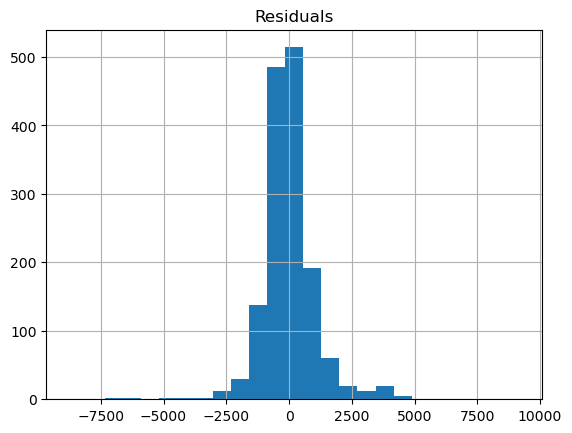

In [29]:
#Validation Error - Evaluate Performance

all_residuals = valid_y - predictionLR

#Determine the percentage of datapoint with a residual in [-2500, 2500] --> 95%
print(len(all_residuals[(all_residuals > -2500) & (all_residuals < 2500)]) / len(all_residuals))

pd.DataFrame({'Residuals' : all_residuals}).hist(bins = 25)
plt.show()

In [30]:
#For Linear Regression (LR) model -- Make predictions on a validation dataset

#Calculate performance metrics (Validation Data)
r2LR = r2_score(valid_y, predictionLR)
mseLR = mean_squared_error(valid_y, predictionLR)
maeLR = mean_absolute_error(valid_y, predictionLR)
mapeLR = mean_absolute_percentage_error(valid_y, predictionLR)
cv_scores_LR = cross_val_score(diamond_LR, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_LR = np.mean(cv_scores_LR)

print(f"R-squared (R2): {r2LR}")
print(f"Mean Squared Error (MSE): {mseLR}")
print(f"Mean Absolute Error (MAE): {maeLR}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeLR}")
print("Cross-Validation R^2 for Linear Regression:", cv_r2_LR)

R-squared (R2): 0.9134679842890003
Mean Squared Error (MSE): 1314185.2699695083
Mean Absolute Error (MAE): 731.6298081311138
Mean Absolute Percentage Error (MAPE): 0.3974558511490505
Cross-Validation R^2 for Linear Regression: 0.8445844000884446


### Model2: Random Forest Regression

In [31]:
#Build Random Forest (RF) model based on the training data

diamond_RF = RandomForestClassifier(n_estimators=100, random_state = 0)
diamond_RF.fit(train_X, train_y)

RandomForestClassifier(random_state=0)

In [32]:
#Print Performance Measures (training data)
regressionSummary(train_y, diamond_RF.predict(train_X))

#Calculate performance metrics (training data)
mse_trainRF = mean_squared_error(train_y, diamond_RF.predict(train_X))
r2_trainRF = r2_score(train_y, diamond_RF.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainRF}")
print(f"R-squared (R2): {r2_trainRF}")


Regression statistics

                      Mean Error (ME) : -0.0714
       Root Mean Squared Error (RMSE) : 3.5095
            Mean Absolute Error (MAE) : 0.0714
          Mean Percentage Error (MPE) : -0.0038
Mean Absolute Percentage Error (MAPE) : 0.0038
Mean Squared Error (MSE): 12.316571428571429
R-squared (R2): 0.9999992075205938


In [33]:
#For Random Forest (RF) -- Make predictions on a validation dataset
predictionRF = diamond_RF.predict(valid_X)

#Calculate performance metrics (Validation Data)
r2RF = r2_score(valid_y, predictionRF)
mseRF = mean_squared_error(valid_y, predictionRF)
maeRF = mean_absolute_error(valid_y, predictionRF)
mapeRF = mean_absolute_percentage_error(valid_y, predictionRF)
cv_scores_RF = cross_val_score(diamond_RF, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_RF = np.mean(cv_scores_RF)

print(f"R-squared (R2): {r2RF}")
print(f"Mean Squared Error (MSE): {mseRF}")
print(f"Mean Absolute Error (MAE): {maeRF}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeRF}")
print("Cross-Validation R^2 for Random Forest Regression:", cv_r2_RF)

R-squared (R2): 0.9000616657801498
Mean Squared Error (MSE): 1517790.6773333333
Mean Absolute Error (MAE): 637.244
Mean Absolute Percentage Error (MAPE): 0.15531269650892723
Cross-Validation R^2 for Random Forest Regression: 0.8946884956394218


### Model3: K-Neighbors Regression

In [34]:
#Normalizing data -- For K-Neighbors Regression (KNR)

scaler = StandardScaler()

X = scaler.fit_transform(train_subset.drop(['price'], axis = 1))
y = scaler.fit_transform(train_subset[['price']])

In [35]:
#Display shape of dataset

train_subset.shape, X.shape, y.shape

((5000, 11), (5000, 10), (5000, 1))

In [36]:
#Creating K-Neighbors Regression (KNR) model with default setting first

diamond_KNR = KNeighborsRegressor()
diamond_KNR.fit(train_X, train_y)

KNeighborsRegressor()

In [37]:
#Print Performance Measures (training data)
regressionSummary(train_y, diamond_KNR.predict(train_X))

#Calculate performance metrics (training data)
mse_trainKNR = mean_squared_error(train_y, diamond_KNR.predict(train_X))
r2_trainKNR = r2_score(train_y, diamond_KNR.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainKNR}")
print(f"R-squared (R2): {r2_trainKNR}")


Regression statistics

                      Mean Error (ME) : -22.4181
       Root Mean Squared Error (RMSE) : 785.0838
            Mean Absolute Error (MAE) : 406.9571
          Mean Percentage Error (MPE) : -3.2891
Mean Absolute Percentage Error (MAPE) : 10.4745
Mean Squared Error (MSE): 616356.6465485713
R-squared (R2): 0.9603420519992018


In [38]:
#For k-NeighborsRegressor (KNR) -- Make predictions on a validation dataset
predictionKNR = diamond_KNR.predict(valid_X)

#Calculate performance metrics (Validation Data)
r2KNR = r2_score(valid_y, predictionKNR)
mseKNR = mean_squared_error(valid_y, predictionKNR)
maeKNR = mean_absolute_error(valid_y, predictionKNR)
mapeKNR = mean_absolute_percentage_error(valid_y, predictionKNR)
cv_scores_KNR = cross_val_score(diamond_KNR, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_KNR = np.mean(cv_scores_KNR)

print(f"R-squared (R2): {r2KNR}")
print(f"Mean Squared Error (MSE): {mseKNR}")
print(f"Mean Absolute Error (MAE): {maeKNR}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeKNR}")
print("Cross-Validation R^2 for K-Neighbours Regression:", cv_r2_KNR)

R-squared (R2): 0.9383464238366157
Mean Squared Error (MSE): 936349.63856
Mean Absolute Error (MAE): 500.6981333333333
Mean Absolute Percentage Error (MAPE): 0.12875675874962558
Cross-Validation R^2 for K-Neighbours Regression: 0.9332249698889086


### Model4: CatBoost Regression

In [39]:
#Creating CatBoost Regression (CBR) model with default setting first

diamond_CBR = CatBoostRegressor()
diamond_CBR.fit(train_X, train_y)

Learning rate set to 0.049905
0:	learn: 3779.7118043	total: 165ms	remaining: 2m 45s
1:	learn: 3620.7221213	total: 169ms	remaining: 1m 24s
2:	learn: 3468.1127822	total: 174ms	remaining: 57.9s
3:	learn: 3328.2160087	total: 182ms	remaining: 45.4s
4:	learn: 3195.7809624	total: 188ms	remaining: 37.3s
5:	learn: 3068.7692008	total: 194ms	remaining: 32.1s
6:	learn: 2944.8439190	total: 198ms	remaining: 28.1s
7:	learn: 2826.3314214	total: 203ms	remaining: 25.2s
8:	learn: 2716.4138679	total: 208ms	remaining: 22.9s
9:	learn: 2605.9806388	total: 213ms	remaining: 21.1s
10:	learn: 2510.1163964	total: 218ms	remaining: 19.6s
11:	learn: 2410.5082654	total: 223ms	remaining: 18.3s
12:	learn: 2316.8471234	total: 228ms	remaining: 17.3s
13:	learn: 2233.7105808	total: 233ms	remaining: 16.4s
14:	learn: 2151.2870459	total: 238ms	remaining: 15.6s
15:	learn: 2071.3738549	total: 242ms	remaining: 14.9s
16:	learn: 1995.7238673	total: 247ms	remaining: 14.3s
17:	learn: 1922.8699534	total: 252ms	remaining: 13.7s
18:	le

204:	learn: 469.5328035	total: 745ms	remaining: 2.89s
205:	learn: 469.0713382	total: 748ms	remaining: 2.88s
206:	learn: 468.6002623	total: 750ms	remaining: 2.87s
207:	learn: 467.5847529	total: 753ms	remaining: 2.87s
208:	learn: 466.5300761	total: 755ms	remaining: 2.86s
209:	learn: 465.7285041	total: 757ms	remaining: 2.85s
210:	learn: 465.1837389	total: 760ms	remaining: 2.84s
211:	learn: 464.5155306	total: 763ms	remaining: 2.83s
212:	learn: 463.9957281	total: 766ms	remaining: 2.83s
213:	learn: 463.4106575	total: 768ms	remaining: 2.82s
214:	learn: 462.3551854	total: 771ms	remaining: 2.81s
215:	learn: 461.9336392	total: 774ms	remaining: 2.81s
216:	learn: 460.6336113	total: 776ms	remaining: 2.8s
217:	learn: 460.1726752	total: 779ms	remaining: 2.79s
218:	learn: 459.3049661	total: 781ms	remaining: 2.79s
219:	learn: 458.9576922	total: 784ms	remaining: 2.78s
220:	learn: 458.1671256	total: 786ms	remaining: 2.77s
221:	learn: 457.6815610	total: 789ms	remaining: 2.76s
222:	learn: 457.0411415	total

361:	learn: 394.8087380	total: 1.13s	remaining: 1.99s
362:	learn: 394.2838804	total: 1.13s	remaining: 1.99s
363:	learn: 394.0936731	total: 1.14s	remaining: 1.98s
364:	learn: 393.7563849	total: 1.14s	remaining: 1.98s
365:	learn: 393.5777126	total: 1.14s	remaining: 1.98s
366:	learn: 392.9139324	total: 1.14s	remaining: 1.97s
367:	learn: 392.6179050	total: 1.15s	remaining: 1.97s
368:	learn: 392.3637984	total: 1.15s	remaining: 1.97s
369:	learn: 392.0264113	total: 1.15s	remaining: 1.96s
370:	learn: 391.7003415	total: 1.16s	remaining: 1.96s
371:	learn: 391.2790146	total: 1.16s	remaining: 1.96s
372:	learn: 391.1074054	total: 1.16s	remaining: 1.95s
373:	learn: 390.5239377	total: 1.16s	remaining: 1.95s
374:	learn: 390.3378158	total: 1.17s	remaining: 1.94s
375:	learn: 390.1103000	total: 1.17s	remaining: 1.94s
376:	learn: 389.7678527	total: 1.17s	remaining: 1.93s
377:	learn: 389.3020715	total: 1.17s	remaining: 1.93s
378:	learn: 389.1403118	total: 1.17s	remaining: 1.92s
379:	learn: 388.9634599	tota

594:	learn: 332.4660355	total: 1.72s	remaining: 1.17s
595:	learn: 332.2596373	total: 1.72s	remaining: 1.17s
596:	learn: 332.0323715	total: 1.72s	remaining: 1.16s
597:	learn: 331.7324234	total: 1.73s	remaining: 1.16s
598:	learn: 331.6556353	total: 1.73s	remaining: 1.16s
599:	learn: 331.3324154	total: 1.73s	remaining: 1.15s
600:	learn: 331.2823410	total: 1.73s	remaining: 1.15s
601:	learn: 331.0943710	total: 1.74s	remaining: 1.15s
602:	learn: 330.9998681	total: 1.74s	remaining: 1.14s
603:	learn: 330.7832908	total: 1.74s	remaining: 1.14s
604:	learn: 330.7751354	total: 1.74s	remaining: 1.14s
605:	learn: 330.3906482	total: 1.75s	remaining: 1.13s
606:	learn: 330.1893496	total: 1.75s	remaining: 1.13s
607:	learn: 330.0076122	total: 1.75s	remaining: 1.13s
608:	learn: 329.8318801	total: 1.75s	remaining: 1.13s
609:	learn: 329.6970163	total: 1.75s	remaining: 1.12s
610:	learn: 329.6905570	total: 1.76s	remaining: 1.12s
611:	learn: 329.6731908	total: 1.76s	remaining: 1.12s
612:	learn: 329.6670356	tota

820:	learn: 290.5409433	total: 2.3s	remaining: 501ms
821:	learn: 290.4262875	total: 2.3s	remaining: 498ms
822:	learn: 290.2786189	total: 2.3s	remaining: 495ms
823:	learn: 290.1177308	total: 2.31s	remaining: 492ms
824:	learn: 290.0285665	total: 2.31s	remaining: 489ms
825:	learn: 289.9159058	total: 2.31s	remaining: 487ms
826:	learn: 289.7810743	total: 2.31s	remaining: 484ms
827:	learn: 289.6536820	total: 2.31s	remaining: 481ms
828:	learn: 289.5382031	total: 2.32s	remaining: 478ms
829:	learn: 289.3007067	total: 2.32s	remaining: 475ms
830:	learn: 289.1901038	total: 2.32s	remaining: 472ms
831:	learn: 289.0599780	total: 2.32s	remaining: 469ms
832:	learn: 288.7601397	total: 2.33s	remaining: 466ms
833:	learn: 288.6513375	total: 2.33s	remaining: 464ms
834:	learn: 288.4208001	total: 2.33s	remaining: 461ms
835:	learn: 288.3043065	total: 2.33s	remaining: 458ms
836:	learn: 288.1496370	total: 2.33s	remaining: 455ms
837:	learn: 288.0627242	total: 2.34s	remaining: 452ms
838:	learn: 287.9345097	total: 

980:	learn: 268.3352136	total: 2.7s	remaining: 52.2ms
981:	learn: 268.2116857	total: 2.7s	remaining: 49.5ms
982:	learn: 267.9981570	total: 2.7s	remaining: 46.7ms
983:	learn: 267.8063236	total: 2.7s	remaining: 44ms
984:	learn: 267.7700806	total: 2.71s	remaining: 41.2ms
985:	learn: 267.6986401	total: 2.71s	remaining: 38.5ms
986:	learn: 267.5102193	total: 2.71s	remaining: 35.7ms
987:	learn: 267.2807662	total: 2.71s	remaining: 33ms
988:	learn: 267.2029609	total: 2.72s	remaining: 30.2ms
989:	learn: 267.1245676	total: 2.72s	remaining: 27.5ms
990:	learn: 267.0393769	total: 2.72s	remaining: 24.7ms
991:	learn: 266.9014987	total: 2.72s	remaining: 22ms
992:	learn: 266.8151277	total: 2.73s	remaining: 19.2ms
993:	learn: 266.7420218	total: 2.73s	remaining: 16.5ms
994:	learn: 266.5928481	total: 2.73s	remaining: 13.7ms
995:	learn: 266.4431115	total: 2.73s	remaining: 11ms
996:	learn: 266.3753195	total: 2.74s	remaining: 8.23ms
997:	learn: 266.2354667	total: 2.74s	remaining: 5.49ms
998:	learn: 266.125220

In [40]:
#Fit the CBR model on the training data

diamond_CBR.fit(train_X, train_y, eval_set=(valid_X, valid_y), early_stopping_rounds=50, verbose=100)

Learning rate set to 0.061989
0:	learn: 3740.5457013	test: 3696.7143841	best: 3696.7143841 (0)	total: 4.7ms	remaining: 4.7s
100:	learn: 541.9595487	test: 632.1076489	best: 632.1076489 (100)	total: 296ms	remaining: 2.63s
200:	learn: 440.6967433	test: 593.2759835	best: 592.6646230 (196)	total: 551ms	remaining: 2.19s
300:	learn: 393.6825749	test: 587.4353709	best: 587.4353709 (300)	total: 802ms	remaining: 1.86s
400:	learn: 353.8339652	test: 584.3838729	best: 584.3838729 (400)	total: 1.06s	remaining: 1.58s
500:	learn: 327.5628386	test: 583.8263534	best: 583.1776534 (475)	total: 1.31s	remaining: 1.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 583.1776534
bestIteration = 475

Shrink model to first 476 iterations.


In [41]:
#Print Performance Measures (training data)
regressionSummary(train_y, diamond_CBR.predict(train_X))

#Calculate performance metrics (training data)
mse_trainCBR = mean_squared_error(train_y, diamond_CBR.predict(train_X))
r2_trainCBR = r2_score(train_y, diamond_CBR.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainCBR}")
print(f"R-squared (R2): {r2_trainCBR}")


Regression statistics

                      Mean Error (ME) : 0.0046
       Root Mean Squared Error (RMSE) : 333.1824
            Mean Absolute Error (MAE) : 211.0169
          Mean Percentage Error (MPE) : -0.9370
Mean Absolute Percentage Error (MAPE) : 7.3946
Mean Squared Error (MSE): 111010.49316814418
R-squared (R2): 0.9928573036564824


In [42]:
#For CatBoost Regression (CBR) model -- Make predictions on a validation dataset
predictionCBR = diamond_CBR.predict(valid_X)

#Calculate performance metrics (Validation Data)
r2CBR = r2_score(valid_y, predictionCBR)
mseCBR = mean_squared_error(valid_y, predictionCBR)
maeCBR = mean_absolute_error(valid_y, predictionCBR)
mapeCBR = mean_absolute_percentage_error(valid_y, predictionCBR)
cv_scores_CBR = cross_val_score(diamond_CBR, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_CBR = np.mean(cv_scores_CBR)

print(f"R-squared (R2): {r2CBR}")
print(f"Mean Squared Error (MSE): {mseCBR}")
print(f"Mean Absolute Error (MAE): {maeCBR}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeCBR}")
print("Cross-Validation R^2 for CatBoost Regression:", cv_r2_CBR)

Learning rate set to 0.048176
0:	learn: 3808.6813623	total: 7.23ms	remaining: 7.22s
1:	learn: 3654.2942355	total: 12.1ms	remaining: 6.03s
2:	learn: 3506.2391721	total: 16.6ms	remaining: 5.53s
3:	learn: 3367.6026409	total: 21ms	remaining: 5.22s
4:	learn: 3239.0997270	total: 25.7ms	remaining: 5.12s
5:	learn: 3115.3501887	total: 29.9ms	remaining: 4.95s
6:	learn: 2993.8951329	total: 34.5ms	remaining: 4.9s
7:	learn: 2883.8961924	total: 39.3ms	remaining: 4.87s
8:	learn: 2776.1793439	total: 44ms	remaining: 4.84s
9:	learn: 2669.5842206	total: 48.7ms	remaining: 4.82s
10:	learn: 2572.7003283	total: 53ms	remaining: 4.76s
11:	learn: 2480.9848270	total: 57.9ms	remaining: 4.77s
12:	learn: 2388.0504430	total: 62.6ms	remaining: 4.75s
13:	learn: 2306.4027013	total: 67.3ms	remaining: 4.74s
14:	learn: 2223.6620539	total: 72ms	remaining: 4.73s
15:	learn: 2141.9636119	total: 76.4ms	remaining: 4.7s
16:	learn: 2068.3715360	total: 81.2ms	remaining: 4.7s
17:	learn: 1993.8107455	total: 85.7ms	remaining: 4.67s
1

212:	learn: 459.9134771	total: 577ms	remaining: 2.13s
213:	learn: 458.9281376	total: 580ms	remaining: 2.13s
214:	learn: 458.5591296	total: 582ms	remaining: 2.12s
215:	learn: 457.5409820	total: 584ms	remaining: 2.12s
216:	learn: 456.7216408	total: 587ms	remaining: 2.12s
217:	learn: 456.2076598	total: 589ms	remaining: 2.11s
218:	learn: 455.3707967	total: 591ms	remaining: 2.11s
219:	learn: 454.5566818	total: 594ms	remaining: 2.1s
220:	learn: 453.3078787	total: 597ms	remaining: 2.1s
221:	learn: 452.2064956	total: 599ms	remaining: 2.1s
222:	learn: 451.8612623	total: 601ms	remaining: 2.1s
223:	learn: 451.3076453	total: 604ms	remaining: 2.09s
224:	learn: 450.9564027	total: 606ms	remaining: 2.09s
225:	learn: 450.6878533	total: 608ms	remaining: 2.08s
226:	learn: 449.8629564	total: 611ms	remaining: 2.08s
227:	learn: 449.3872387	total: 613ms	remaining: 2.08s
228:	learn: 448.9116826	total: 616ms	remaining: 2.07s
229:	learn: 448.7137000	total: 618ms	remaining: 2.07s
230:	learn: 447.9978268	total: 6

379:	learn: 380.1016991	total: 978ms	remaining: 1.59s
380:	learn: 379.6907192	total: 980ms	remaining: 1.59s
381:	learn: 379.1453144	total: 983ms	remaining: 1.59s
382:	learn: 378.7191363	total: 985ms	remaining: 1.59s
383:	learn: 378.1654337	total: 987ms	remaining: 1.58s
384:	learn: 377.9302085	total: 989ms	remaining: 1.58s
385:	learn: 377.7731108	total: 992ms	remaining: 1.58s
386:	learn: 377.6218785	total: 994ms	remaining: 1.57s
387:	learn: 377.4006218	total: 997ms	remaining: 1.57s
388:	learn: 376.9995871	total: 999ms	remaining: 1.57s
389:	learn: 376.7996104	total: 1s	remaining: 1.57s
390:	learn: 376.5710172	total: 1s	remaining: 1.56s
391:	learn: 376.2022460	total: 1.01s	remaining: 1.56s
392:	learn: 375.9291199	total: 1.01s	remaining: 1.56s
393:	learn: 375.6262369	total: 1.01s	remaining: 1.55s
394:	learn: 375.5074380	total: 1.01s	remaining: 1.55s
395:	learn: 375.3629864	total: 1.01s	remaining: 1.55s
396:	learn: 375.1025306	total: 1.02s	remaining: 1.55s
397:	learn: 374.6289153	total: 1.0

542:	learn: 333.9846877	total: 1.38s	remaining: 1.16s
543:	learn: 333.9134487	total: 1.38s	remaining: 1.16s
544:	learn: 333.8474828	total: 1.38s	remaining: 1.16s
545:	learn: 333.6372618	total: 1.39s	remaining: 1.15s
546:	learn: 333.4051763	total: 1.39s	remaining: 1.15s
547:	learn: 333.1024882	total: 1.39s	remaining: 1.15s
548:	learn: 333.0028327	total: 1.4s	remaining: 1.15s
549:	learn: 332.5137883	total: 1.4s	remaining: 1.14s
550:	learn: 332.3954551	total: 1.4s	remaining: 1.14s
551:	learn: 332.0973615	total: 1.4s	remaining: 1.14s
552:	learn: 331.8021272	total: 1.41s	remaining: 1.14s
553:	learn: 331.4181928	total: 1.41s	remaining: 1.13s
554:	learn: 331.1627032	total: 1.41s	remaining: 1.13s
555:	learn: 331.0500249	total: 1.41s	remaining: 1.13s
556:	learn: 330.9703523	total: 1.42s	remaining: 1.13s
557:	learn: 330.8153722	total: 1.42s	remaining: 1.12s
558:	learn: 330.5269324	total: 1.42s	remaining: 1.12s
559:	learn: 330.4194704	total: 1.42s	remaining: 1.12s
560:	learn: 330.1620585	total: 1

765:	learn: 288.5097934	total: 1.95s	remaining: 596ms
766:	learn: 288.2076466	total: 1.95s	remaining: 594ms
767:	learn: 288.0951273	total: 1.96s	remaining: 591ms
768:	learn: 287.8082147	total: 1.96s	remaining: 589ms
769:	learn: 287.6160537	total: 1.96s	remaining: 586ms
770:	learn: 287.5544199	total: 1.96s	remaining: 583ms
771:	learn: 287.3441236	total: 1.97s	remaining: 581ms
772:	learn: 287.2024633	total: 1.97s	remaining: 579ms
773:	learn: 287.0207594	total: 1.97s	remaining: 576ms
774:	learn: 286.8945481	total: 1.98s	remaining: 573ms
775:	learn: 286.6612814	total: 1.98s	remaining: 571ms
776:	learn: 286.5643571	total: 1.98s	remaining: 568ms
777:	learn: 286.4856647	total: 1.98s	remaining: 566ms
778:	learn: 286.4037768	total: 1.99s	remaining: 563ms
779:	learn: 286.3658763	total: 1.99s	remaining: 561ms
780:	learn: 286.2878545	total: 1.99s	remaining: 559ms
781:	learn: 286.2242349	total: 1.99s	remaining: 556ms
782:	learn: 286.0128896	total: 2s	remaining: 554ms
783:	learn: 285.8110743	total: 

924:	learn: 263.9322065	total: 2.35s	remaining: 191ms
925:	learn: 263.7055019	total: 2.36s	remaining: 188ms
926:	learn: 263.5317370	total: 2.36s	remaining: 186ms
927:	learn: 263.5051304	total: 2.36s	remaining: 183ms
928:	learn: 263.2536029	total: 2.37s	remaining: 181ms
929:	learn: 262.9954077	total: 2.37s	remaining: 178ms
930:	learn: 262.7875224	total: 2.37s	remaining: 176ms
931:	learn: 262.6430187	total: 2.37s	remaining: 173ms
932:	learn: 262.5976012	total: 2.37s	remaining: 171ms
933:	learn: 262.5019468	total: 2.38s	remaining: 168ms
934:	learn: 262.4671979	total: 2.38s	remaining: 165ms
935:	learn: 262.2382937	total: 2.38s	remaining: 163ms
936:	learn: 261.9545133	total: 2.38s	remaining: 160ms
937:	learn: 261.7273279	total: 2.39s	remaining: 158ms
938:	learn: 261.6973146	total: 2.39s	remaining: 155ms
939:	learn: 261.6512659	total: 2.39s	remaining: 153ms
940:	learn: 261.6223336	total: 2.4s	remaining: 150ms
941:	learn: 261.3427976	total: 2.4s	remaining: 148ms
942:	learn: 261.1193060	total:

158:	learn: 502.3016353	total: 395ms	remaining: 2.09s
159:	learn: 501.0958160	total: 398ms	remaining: 2.09s
160:	learn: 500.2033537	total: 400ms	remaining: 2.08s
161:	learn: 499.0486331	total: 402ms	remaining: 2.08s
162:	learn: 497.7580955	total: 404ms	remaining: 2.08s
163:	learn: 496.7656998	total: 407ms	remaining: 2.07s
164:	learn: 495.8788902	total: 409ms	remaining: 2.07s
165:	learn: 494.8989822	total: 411ms	remaining: 2.06s
166:	learn: 494.2893016	total: 414ms	remaining: 2.06s
167:	learn: 493.0054828	total: 416ms	remaining: 2.06s
168:	learn: 492.1737057	total: 418ms	remaining: 2.06s
169:	learn: 490.7406864	total: 421ms	remaining: 2.05s
170:	learn: 489.6839622	total: 423ms	remaining: 2.05s
171:	learn: 488.8442594	total: 425ms	remaining: 2.05s
172:	learn: 487.9242781	total: 428ms	remaining: 2.04s
173:	learn: 487.0087447	total: 430ms	remaining: 2.04s
174:	learn: 486.1567100	total: 432ms	remaining: 2.04s
175:	learn: 484.9313425	total: 434ms	remaining: 2.03s
176:	learn: 484.1056913	tota

318:	learn: 395.3551825	total: 774ms	remaining: 1.65s
319:	learn: 395.0576222	total: 776ms	remaining: 1.65s
320:	learn: 394.7505572	total: 779ms	remaining: 1.65s
321:	learn: 394.5584326	total: 781ms	remaining: 1.64s
322:	learn: 394.2480107	total: 783ms	remaining: 1.64s
323:	learn: 393.9984048	total: 786ms	remaining: 1.64s
324:	learn: 393.4472470	total: 789ms	remaining: 1.64s
325:	learn: 393.1599734	total: 791ms	remaining: 1.64s
326:	learn: 392.5251817	total: 793ms	remaining: 1.63s
327:	learn: 392.2387424	total: 795ms	remaining: 1.63s
328:	learn: 391.6593440	total: 798ms	remaining: 1.63s
329:	learn: 391.3607262	total: 800ms	remaining: 1.62s
330:	learn: 391.1307541	total: 802ms	remaining: 1.62s
331:	learn: 390.6108189	total: 805ms	remaining: 1.62s
332:	learn: 390.2198164	total: 807ms	remaining: 1.62s
333:	learn: 389.8237299	total: 810ms	remaining: 1.61s
334:	learn: 389.5694754	total: 812ms	remaining: 1.61s
335:	learn: 388.9769384	total: 815ms	remaining: 1.61s
336:	learn: 388.5595290	tota

482:	learn: 340.2937589	total: 1.17s	remaining: 1.25s
483:	learn: 340.0137566	total: 1.17s	remaining: 1.25s
484:	learn: 339.8028927	total: 1.17s	remaining: 1.24s
485:	learn: 339.5346108	total: 1.17s	remaining: 1.24s
486:	learn: 339.3824504	total: 1.18s	remaining: 1.24s
487:	learn: 339.1001002	total: 1.18s	remaining: 1.24s
488:	learn: 338.7040721	total: 1.18s	remaining: 1.23s
489:	learn: 338.3327768	total: 1.18s	remaining: 1.23s
490:	learn: 338.1156906	total: 1.19s	remaining: 1.23s
491:	learn: 337.8963618	total: 1.19s	remaining: 1.23s
492:	learn: 337.6829398	total: 1.19s	remaining: 1.22s
493:	learn: 337.4440436	total: 1.19s	remaining: 1.22s
494:	learn: 337.0300518	total: 1.19s	remaining: 1.22s
495:	learn: 336.7269701	total: 1.2s	remaining: 1.22s
496:	learn: 336.5819322	total: 1.2s	remaining: 1.21s
497:	learn: 336.2947073	total: 1.2s	remaining: 1.21s
498:	learn: 335.9836472	total: 1.2s	remaining: 1.21s
499:	learn: 335.6054154	total: 1.21s	remaining: 1.21s
500:	learn: 335.3565616	total: 1

646:	learn: 303.8719425	total: 1.56s	remaining: 852ms
647:	learn: 303.5979419	total: 1.56s	remaining: 850ms
648:	learn: 303.4630474	total: 1.57s	remaining: 847ms
649:	learn: 303.2341064	total: 1.57s	remaining: 845ms
650:	learn: 303.0723968	total: 1.57s	remaining: 843ms
651:	learn: 302.9331430	total: 1.57s	remaining: 840ms
652:	learn: 302.7435319	total: 1.58s	remaining: 838ms
653:	learn: 302.4783025	total: 1.58s	remaining: 835ms
654:	learn: 302.1642139	total: 1.58s	remaining: 833ms
655:	learn: 302.0141048	total: 1.58s	remaining: 830ms
656:	learn: 301.8730357	total: 1.58s	remaining: 828ms
657:	learn: 301.7171044	total: 1.59s	remaining: 825ms
658:	learn: 301.5402284	total: 1.59s	remaining: 823ms
659:	learn: 301.3938909	total: 1.59s	remaining: 821ms
660:	learn: 301.1840362	total: 1.59s	remaining: 818ms
661:	learn: 300.9586753	total: 1.6s	remaining: 816ms
662:	learn: 300.8263313	total: 1.6s	remaining: 813ms
663:	learn: 300.4358581	total: 1.6s	remaining: 811ms
664:	learn: 300.2164624	total: 

815:	learn: 271.4683914	total: 1.97s	remaining: 444ms
816:	learn: 271.3367125	total: 1.97s	remaining: 442ms
817:	learn: 271.2811203	total: 1.97s	remaining: 439ms
818:	learn: 271.1813534	total: 1.98s	remaining: 437ms
819:	learn: 271.0586305	total: 1.98s	remaining: 434ms
820:	learn: 270.9444379	total: 1.98s	remaining: 432ms
821:	learn: 270.7515467	total: 1.98s	remaining: 429ms
822:	learn: 270.4837567	total: 1.98s	remaining: 427ms
823:	learn: 270.2435519	total: 1.99s	remaining: 424ms
824:	learn: 269.9838719	total: 1.99s	remaining: 422ms
825:	learn: 269.8889731	total: 1.99s	remaining: 419ms
826:	learn: 269.7966100	total: 1.99s	remaining: 417ms
827:	learn: 269.7342645	total: 2s	remaining: 415ms
828:	learn: 269.5423815	total: 2s	remaining: 412ms
829:	learn: 269.4428510	total: 2s	remaining: 410ms
830:	learn: 269.2477600	total: 2s	remaining: 407ms
831:	learn: 269.1704292	total: 2s	remaining: 405ms
832:	learn: 269.0185490	total: 2.01s	remaining: 402ms
833:	learn: 268.9631094	total: 2.01s	remain

982:	learn: 250.8350663	total: 2.37s	remaining: 40.9ms
983:	learn: 250.6639666	total: 2.37s	remaining: 38.5ms
984:	learn: 250.5288509	total: 2.37s	remaining: 36.1ms
985:	learn: 250.3475638	total: 2.37s	remaining: 33.7ms
986:	learn: 250.1578872	total: 2.37s	remaining: 31.3ms
987:	learn: 250.0855861	total: 2.38s	remaining: 28.9ms
988:	learn: 249.9053164	total: 2.38s	remaining: 26.5ms
989:	learn: 249.7709068	total: 2.38s	remaining: 24.1ms
990:	learn: 249.7367596	total: 2.38s	remaining: 21.7ms
991:	learn: 249.5791974	total: 2.39s	remaining: 19.3ms
992:	learn: 249.4297409	total: 2.39s	remaining: 16.8ms
993:	learn: 249.3050698	total: 2.39s	remaining: 14.4ms
994:	learn: 249.2172620	total: 2.39s	remaining: 12ms
995:	learn: 249.0960766	total: 2.4s	remaining: 9.63ms
996:	learn: 248.8695045	total: 2.4s	remaining: 7.22ms
997:	learn: 248.6778643	total: 2.4s	remaining: 4.81ms
998:	learn: 248.5100088	total: 2.4s	remaining: 2.41ms
999:	learn: 248.3342564	total: 2.41s	remaining: 0us
Learning rate set t

191:	learn: 483.4857023	total: 487ms	remaining: 2.05s
192:	learn: 482.5291338	total: 490ms	remaining: 2.05s
193:	learn: 481.9776220	total: 492ms	remaining: 2.04s
194:	learn: 481.2952517	total: 494ms	remaining: 2.04s
195:	learn: 480.6665659	total: 497ms	remaining: 2.04s
196:	learn: 480.1653075	total: 499ms	remaining: 2.03s
197:	learn: 479.2280381	total: 501ms	remaining: 2.03s
198:	learn: 478.2488371	total: 504ms	remaining: 2.03s
199:	learn: 477.2583135	total: 506ms	remaining: 2.02s
200:	learn: 476.6411015	total: 509ms	remaining: 2.02s
201:	learn: 476.2028351	total: 511ms	remaining: 2.02s
202:	learn: 475.4646647	total: 513ms	remaining: 2.02s
203:	learn: 474.1334916	total: 516ms	remaining: 2.01s
204:	learn: 473.4509121	total: 518ms	remaining: 2.01s
205:	learn: 472.6672274	total: 520ms	remaining: 2s
206:	learn: 472.0932615	total: 523ms	remaining: 2s
207:	learn: 471.1629972	total: 525ms	remaining: 2s
208:	learn: 469.6741819	total: 528ms	remaining: 2s
209:	learn: 468.9979934	total: 530ms	rem

356:	learn: 395.6809411	total: 881ms	remaining: 1.59s
357:	learn: 395.2722866	total: 883ms	remaining: 1.58s
358:	learn: 395.1340487	total: 885ms	remaining: 1.58s
359:	learn: 394.6992780	total: 888ms	remaining: 1.58s
360:	learn: 393.9522777	total: 890ms	remaining: 1.57s
361:	learn: 393.8195461	total: 892ms	remaining: 1.57s
362:	learn: 393.2284957	total: 894ms	remaining: 1.57s
363:	learn: 392.6331508	total: 897ms	remaining: 1.57s
364:	learn: 392.0781312	total: 899ms	remaining: 1.56s
365:	learn: 391.7026200	total: 901ms	remaining: 1.56s
366:	learn: 391.2110669	total: 904ms	remaining: 1.56s
367:	learn: 390.8538511	total: 905ms	remaining: 1.55s
368:	learn: 390.5360723	total: 908ms	remaining: 1.55s
369:	learn: 390.0028861	total: 910ms	remaining: 1.55s
370:	learn: 389.5166296	total: 913ms	remaining: 1.55s
371:	learn: 389.2148606	total: 915ms	remaining: 1.54s
372:	learn: 388.8727878	total: 918ms	remaining: 1.54s
373:	learn: 388.4845517	total: 920ms	remaining: 1.54s
374:	learn: 388.0942985	tota

517:	learn: 342.8583353	total: 1.26s	remaining: 1.17s
518:	learn: 342.6566388	total: 1.26s	remaining: 1.17s
519:	learn: 342.6216331	total: 1.27s	remaining: 1.17s
520:	learn: 342.4764176	total: 1.27s	remaining: 1.17s
521:	learn: 342.1705794	total: 1.27s	remaining: 1.16s
522:	learn: 341.9123737	total: 1.27s	remaining: 1.16s
523:	learn: 341.7080021	total: 1.27s	remaining: 1.16s
524:	learn: 341.5250409	total: 1.28s	remaining: 1.16s
525:	learn: 341.0670969	total: 1.28s	remaining: 1.15s
526:	learn: 340.9590457	total: 1.28s	remaining: 1.15s
527:	learn: 340.8474502	total: 1.28s	remaining: 1.15s
528:	learn: 340.6363170	total: 1.29s	remaining: 1.15s
529:	learn: 340.4488471	total: 1.29s	remaining: 1.14s
530:	learn: 340.1863792	total: 1.29s	remaining: 1.14s
531:	learn: 340.1798565	total: 1.29s	remaining: 1.14s
532:	learn: 339.9566074	total: 1.29s	remaining: 1.14s
533:	learn: 339.8027784	total: 1.3s	remaining: 1.13s
534:	learn: 339.3170922	total: 1.3s	remaining: 1.13s
535:	learn: 339.1862489	total:

678:	learn: 305.0230277	total: 1.66s	remaining: 783ms
679:	learn: 304.7809978	total: 1.66s	remaining: 780ms
680:	learn: 304.5948578	total: 1.66s	remaining: 778ms
681:	learn: 304.5602726	total: 1.66s	remaining: 776ms
682:	learn: 304.3636281	total: 1.67s	remaining: 773ms
683:	learn: 304.1487758	total: 1.67s	remaining: 771ms
684:	learn: 303.9628319	total: 1.67s	remaining: 769ms
685:	learn: 303.8173895	total: 1.67s	remaining: 766ms
686:	learn: 303.6437439	total: 1.68s	remaining: 764ms
687:	learn: 303.5652453	total: 1.68s	remaining: 761ms
688:	learn: 303.3802728	total: 1.68s	remaining: 759ms
689:	learn: 303.3715860	total: 1.68s	remaining: 756ms
690:	learn: 303.1334575	total: 1.69s	remaining: 754ms
691:	learn: 302.9499829	total: 1.69s	remaining: 751ms
692:	learn: 302.6880890	total: 1.69s	remaining: 749ms
693:	learn: 302.5681066	total: 1.69s	remaining: 746ms
694:	learn: 302.4128486	total: 1.69s	remaining: 744ms
695:	learn: 302.2109396	total: 1.7s	remaining: 741ms
696:	learn: 301.9794277	total

841:	learn: 277.7857032	total: 2.06s	remaining: 386ms
842:	learn: 277.6361725	total: 2.06s	remaining: 384ms
843:	learn: 277.5957162	total: 2.06s	remaining: 381ms
844:	learn: 277.3884221	total: 2.06s	remaining: 379ms
845:	learn: 277.0983277	total: 2.07s	remaining: 376ms
846:	learn: 276.8703322	total: 2.07s	remaining: 374ms
847:	learn: 276.6695323	total: 2.07s	remaining: 371ms
848:	learn: 276.6574753	total: 2.07s	remaining: 369ms
849:	learn: 276.5369713	total: 2.08s	remaining: 366ms
850:	learn: 276.3449532	total: 2.08s	remaining: 364ms
851:	learn: 276.2168920	total: 2.08s	remaining: 361ms
852:	learn: 276.1786294	total: 2.08s	remaining: 359ms
853:	learn: 276.0086466	total: 2.08s	remaining: 356ms
854:	learn: 275.8949098	total: 2.09s	remaining: 354ms
855:	learn: 275.8439046	total: 2.09s	remaining: 352ms
856:	learn: 275.6528123	total: 2.09s	remaining: 349ms
857:	learn: 275.5284749	total: 2.09s	remaining: 347ms
858:	learn: 275.4206868	total: 2.1s	remaining: 344ms
859:	learn: 275.2563058	total

Learning rate set to 0.048176
0:	learn: 3813.8585786	total: 4.54ms	remaining: 4.54s
1:	learn: 3660.0534111	total: 8.36ms	remaining: 4.17s
2:	learn: 3512.1527031	total: 13.1ms	remaining: 4.35s
3:	learn: 3373.8459059	total: 17.2ms	remaining: 4.29s
4:	learn: 3240.9726226	total: 21.3ms	remaining: 4.25s
5:	learn: 3112.2762317	total: 24.5ms	remaining: 4.06s
6:	learn: 2991.9652771	total: 28.6ms	remaining: 4.05s
7:	learn: 2875.6462656	total: 32.2ms	remaining: 4s
8:	learn: 2765.4703969	total: 35.5ms	remaining: 3.91s
9:	learn: 2658.6389203	total: 38.9ms	remaining: 3.85s
10:	learn: 2563.4796159	total: 41.6ms	remaining: 3.74s
11:	learn: 2466.3245301	total: 44.5ms	remaining: 3.66s
12:	learn: 2374.7768142	total: 47.2ms	remaining: 3.58s
13:	learn: 2292.2197980	total: 49.6ms	remaining: 3.49s
14:	learn: 2210.3583919	total: 52.1ms	remaining: 3.42s
15:	learn: 2129.0142070	total: 54.4ms	remaining: 3.35s
16:	learn: 2055.3928932	total: 56.9ms	remaining: 3.29s
17:	learn: 1980.5138598	total: 59.3ms	remaining:

155:	learn: 500.0402917	total: 394ms	remaining: 2.13s
156:	learn: 499.2713777	total: 396ms	remaining: 2.13s
157:	learn: 498.4160921	total: 398ms	remaining: 2.12s
158:	learn: 496.8217747	total: 401ms	remaining: 2.12s
159:	learn: 496.0088870	total: 403ms	remaining: 2.12s
160:	learn: 495.1839491	total: 406ms	remaining: 2.11s
161:	learn: 494.2307655	total: 408ms	remaining: 2.11s
162:	learn: 493.1819385	total: 411ms	remaining: 2.11s
163:	learn: 492.1896981	total: 413ms	remaining: 2.1s
164:	learn: 491.1158963	total: 415ms	remaining: 2.1s
165:	learn: 489.7689312	total: 417ms	remaining: 2.1s
166:	learn: 488.9258381	total: 419ms	remaining: 2.09s
167:	learn: 488.3511822	total: 422ms	remaining: 2.09s
168:	learn: 487.5629123	total: 424ms	remaining: 2.08s
169:	learn: 486.7884270	total: 426ms	remaining: 2.08s
170:	learn: 485.8339068	total: 429ms	remaining: 2.08s
171:	learn: 485.0993180	total: 431ms	remaining: 2.08s
172:	learn: 483.8024785	total: 434ms	remaining: 2.07s
173:	learn: 482.7247795	total: 

314:	learn: 398.5792806	total: 769ms	remaining: 1.67s
315:	learn: 398.3202614	total: 772ms	remaining: 1.67s
316:	learn: 398.0378279	total: 774ms	remaining: 1.67s
317:	learn: 397.9620552	total: 776ms	remaining: 1.66s
318:	learn: 397.8087715	total: 778ms	remaining: 1.66s
319:	learn: 397.3227894	total: 781ms	remaining: 1.66s
320:	learn: 397.0177316	total: 783ms	remaining: 1.66s
321:	learn: 396.5118068	total: 785ms	remaining: 1.65s
322:	learn: 396.1484497	total: 788ms	remaining: 1.65s
323:	learn: 395.8951753	total: 790ms	remaining: 1.65s
324:	learn: 395.2677867	total: 792ms	remaining: 1.65s
325:	learn: 394.8476145	total: 794ms	remaining: 1.64s
326:	learn: 394.6059592	total: 797ms	remaining: 1.64s
327:	learn: 394.3753436	total: 799ms	remaining: 1.64s
328:	learn: 394.1958228	total: 801ms	remaining: 1.63s
329:	learn: 393.9915870	total: 804ms	remaining: 1.63s
330:	learn: 393.7665157	total: 806ms	remaining: 1.63s
331:	learn: 393.2976461	total: 808ms	remaining: 1.63s
332:	learn: 392.2315549	tota

471:	learn: 347.7420970	total: 1.16s	remaining: 1.29s
472:	learn: 347.2138501	total: 1.16s	remaining: 1.29s
473:	learn: 346.9575249	total: 1.16s	remaining: 1.29s
474:	learn: 346.8872870	total: 1.16s	remaining: 1.29s
475:	learn: 346.5035423	total: 1.17s	remaining: 1.28s
476:	learn: 346.1593799	total: 1.17s	remaining: 1.28s
477:	learn: 346.0568207	total: 1.17s	remaining: 1.28s
478:	learn: 345.8727175	total: 1.17s	remaining: 1.28s
479:	learn: 345.5094112	total: 1.18s	remaining: 1.27s
480:	learn: 345.2908379	total: 1.18s	remaining: 1.27s
481:	learn: 344.9662210	total: 1.18s	remaining: 1.27s
482:	learn: 344.7265520	total: 1.19s	remaining: 1.27s
483:	learn: 344.5728847	total: 1.19s	remaining: 1.27s
484:	learn: 344.4670336	total: 1.19s	remaining: 1.26s
485:	learn: 344.1981448	total: 1.19s	remaining: 1.26s
486:	learn: 343.8219812	total: 1.2s	remaining: 1.26s
487:	learn: 343.4802540	total: 1.2s	remaining: 1.26s
488:	learn: 343.0845346	total: 1.2s	remaining: 1.25s
489:	learn: 342.7599105	total: 

626:	learn: 311.0490078	total: 1.55s	remaining: 921ms
627:	learn: 310.8882829	total: 1.55s	remaining: 918ms
628:	learn: 310.6937392	total: 1.55s	remaining: 916ms
629:	learn: 310.5092956	total: 1.55s	remaining: 913ms
630:	learn: 310.4056789	total: 1.56s	remaining: 911ms
631:	learn: 310.1988298	total: 1.56s	remaining: 908ms
632:	learn: 310.0765039	total: 1.56s	remaining: 906ms
633:	learn: 309.8564474	total: 1.56s	remaining: 903ms
634:	learn: 309.6105811	total: 1.57s	remaining: 901ms
635:	learn: 309.3818608	total: 1.57s	remaining: 899ms
636:	learn: 309.2851088	total: 1.57s	remaining: 896ms
637:	learn: 309.1063135	total: 1.57s	remaining: 894ms
638:	learn: 308.8868855	total: 1.58s	remaining: 891ms
639:	learn: 308.6836384	total: 1.58s	remaining: 889ms
640:	learn: 308.3703824	total: 1.58s	remaining: 886ms
641:	learn: 308.2386196	total: 1.58s	remaining: 884ms
642:	learn: 308.1849272	total: 1.59s	remaining: 881ms
643:	learn: 307.9502176	total: 1.59s	remaining: 879ms
644:	learn: 307.7806560	tota

789:	learn: 281.2830744	total: 1.94s	remaining: 516ms
790:	learn: 281.1412593	total: 1.94s	remaining: 514ms
791:	learn: 280.8533723	total: 1.95s	remaining: 511ms
792:	learn: 280.7090559	total: 1.95s	remaining: 509ms
793:	learn: 280.6592951	total: 1.95s	remaining: 506ms
794:	learn: 280.5623807	total: 1.95s	remaining: 504ms
795:	learn: 280.4218930	total: 1.96s	remaining: 501ms
796:	learn: 280.1853533	total: 1.96s	remaining: 499ms
797:	learn: 280.1400088	total: 1.96s	remaining: 496ms
798:	learn: 279.9486322	total: 1.96s	remaining: 494ms
799:	learn: 279.8376362	total: 1.97s	remaining: 491ms
800:	learn: 279.7649976	total: 1.97s	remaining: 489ms
801:	learn: 279.6756766	total: 1.97s	remaining: 486ms
802:	learn: 279.6034126	total: 1.97s	remaining: 484ms
803:	learn: 279.3840273	total: 1.97s	remaining: 481ms
804:	learn: 279.2624360	total: 1.98s	remaining: 479ms
805:	learn: 279.0737152	total: 1.98s	remaining: 477ms
806:	learn: 278.9518105	total: 1.98s	remaining: 474ms
807:	learn: 278.8804740	tota

954:	learn: 261.3541654	total: 2.33s	remaining: 110ms
955:	learn: 261.2843315	total: 2.33s	remaining: 107ms
956:	learn: 261.2634033	total: 2.34s	remaining: 105ms
957:	learn: 261.1238332	total: 2.34s	remaining: 103ms
958:	learn: 260.9001797	total: 2.34s	remaining: 100ms
959:	learn: 260.8091883	total: 2.34s	remaining: 97.7ms
960:	learn: 260.7461673	total: 2.35s	remaining: 95.2ms
961:	learn: 260.6002963	total: 2.35s	remaining: 92.8ms
962:	learn: 260.5132795	total: 2.35s	remaining: 90.3ms
963:	learn: 260.2932214	total: 2.35s	remaining: 87.9ms
964:	learn: 260.2684542	total: 2.35s	remaining: 85.4ms
965:	learn: 260.2488789	total: 2.36s	remaining: 83ms
966:	learn: 260.1683473	total: 2.36s	remaining: 80.5ms
967:	learn: 259.9730267	total: 2.36s	remaining: 78.1ms
968:	learn: 259.9531213	total: 2.36s	remaining: 75.6ms
969:	learn: 259.7749708	total: 2.37s	remaining: 73.2ms
970:	learn: 259.7349456	total: 2.37s	remaining: 70.8ms
971:	learn: 259.6077568	total: 2.37s	remaining: 68.3ms
972:	learn: 259.4

167:	learn: 502.9308411	total: 428ms	remaining: 2.12s
168:	learn: 502.2932865	total: 430ms	remaining: 2.11s
169:	learn: 500.8869704	total: 432ms	remaining: 2.11s
170:	learn: 500.0690009	total: 435ms	remaining: 2.11s
171:	learn: 498.6793673	total: 437ms	remaining: 2.1s
172:	learn: 497.6091535	total: 439ms	remaining: 2.1s
173:	learn: 496.6490097	total: 442ms	remaining: 2.1s
174:	learn: 496.1062355	total: 444ms	remaining: 2.09s
175:	learn: 494.6332170	total: 446ms	remaining: 2.09s
176:	learn: 494.1419137	total: 448ms	remaining: 2.08s
177:	learn: 492.9673130	total: 450ms	remaining: 2.08s
178:	learn: 492.2036524	total: 453ms	remaining: 2.08s
179:	learn: 491.4941278	total: 455ms	remaining: 2.07s
180:	learn: 490.0366507	total: 457ms	remaining: 2.07s
181:	learn: 488.9654296	total: 460ms	remaining: 2.07s
182:	learn: 488.1638096	total: 462ms	remaining: 2.06s
183:	learn: 487.3599106	total: 465ms	remaining: 2.06s
184:	learn: 486.3858117	total: 467ms	remaining: 2.06s
185:	learn: 485.2409334	total: 

328:	learn: 402.9831781	total: 816ms	remaining: 1.67s
329:	learn: 402.3889365	total: 819ms	remaining: 1.66s
330:	learn: 402.0539336	total: 821ms	remaining: 1.66s
331:	learn: 401.8585873	total: 824ms	remaining: 1.66s
332:	learn: 401.2016548	total: 826ms	remaining: 1.65s
333:	learn: 400.9197771	total: 828ms	remaining: 1.65s
334:	learn: 400.3216861	total: 830ms	remaining: 1.65s
335:	learn: 400.1375483	total: 832ms	remaining: 1.65s
336:	learn: 399.7983179	total: 835ms	remaining: 1.64s
337:	learn: 399.2194588	total: 838ms	remaining: 1.64s
338:	learn: 398.9604650	total: 840ms	remaining: 1.64s
339:	learn: 398.6955087	total: 842ms	remaining: 1.63s
340:	learn: 398.1534239	total: 844ms	remaining: 1.63s
341:	learn: 397.6008107	total: 847ms	remaining: 1.63s
342:	learn: 397.3401734	total: 849ms	remaining: 1.63s
343:	learn: 397.1391933	total: 851ms	remaining: 1.62s
344:	learn: 396.9292395	total: 853ms	remaining: 1.62s
345:	learn: 396.6803268	total: 855ms	remaining: 1.62s
346:	learn: 396.3712905	tota

492:	learn: 345.9624168	total: 1.21s	remaining: 1.24s
493:	learn: 345.5838052	total: 1.21s	remaining: 1.24s
494:	learn: 345.3242707	total: 1.21s	remaining: 1.24s
495:	learn: 344.8488554	total: 1.22s	remaining: 1.24s
496:	learn: 344.6209295	total: 1.22s	remaining: 1.23s
497:	learn: 344.4769734	total: 1.22s	remaining: 1.23s
498:	learn: 344.1390385	total: 1.22s	remaining: 1.23s
499:	learn: 343.8299194	total: 1.23s	remaining: 1.23s
500:	learn: 343.5763804	total: 1.23s	remaining: 1.22s
501:	learn: 343.5177368	total: 1.23s	remaining: 1.22s
502:	learn: 343.2865520	total: 1.23s	remaining: 1.22s
503:	learn: 343.1606145	total: 1.24s	remaining: 1.22s
504:	learn: 342.9163120	total: 1.24s	remaining: 1.21s
505:	learn: 342.6264585	total: 1.24s	remaining: 1.21s
506:	learn: 342.3451421	total: 1.24s	remaining: 1.21s
507:	learn: 342.1527207	total: 1.25s	remaining: 1.21s
508:	learn: 342.0483693	total: 1.25s	remaining: 1.2s
509:	learn: 341.8012399	total: 1.25s	remaining: 1.2s
510:	learn: 341.4998885	total:

660:	learn: 305.4531445	total: 1.6s	remaining: 823ms
661:	learn: 305.1681486	total: 1.61s	remaining: 821ms
662:	learn: 304.9276333	total: 1.61s	remaining: 818ms
663:	learn: 304.8637406	total: 1.61s	remaining: 816ms
664:	learn: 304.6661884	total: 1.61s	remaining: 813ms
665:	learn: 304.6024943	total: 1.61s	remaining: 810ms
666:	learn: 304.4687415	total: 1.62s	remaining: 808ms
667:	learn: 304.3839796	total: 1.62s	remaining: 805ms
668:	learn: 304.2036082	total: 1.62s	remaining: 803ms
669:	learn: 303.9549758	total: 1.63s	remaining: 800ms
670:	learn: 303.7180888	total: 1.63s	remaining: 798ms
671:	learn: 303.5804657	total: 1.63s	remaining: 796ms
672:	learn: 303.3448199	total: 1.63s	remaining: 793ms
673:	learn: 303.1434329	total: 1.63s	remaining: 791ms
674:	learn: 302.9856808	total: 1.64s	remaining: 788ms
675:	learn: 302.8849528	total: 1.64s	remaining: 786ms
676:	learn: 302.6919005	total: 1.64s	remaining: 783ms
677:	learn: 302.6321242	total: 1.64s	remaining: 781ms
678:	learn: 302.4473757	total

819:	learn: 279.4287277	total: 1.98s	remaining: 436ms
820:	learn: 279.4056565	total: 1.99s	remaining: 433ms
821:	learn: 279.2654299	total: 1.99s	remaining: 431ms
822:	learn: 279.1746817	total: 1.99s	remaining: 428ms
823:	learn: 278.9930796	total: 1.99s	remaining: 426ms
824:	learn: 278.9265131	total: 2s	remaining: 423ms
825:	learn: 278.8498332	total: 2s	remaining: 421ms
826:	learn: 278.6348396	total: 2s	remaining: 418ms
827:	learn: 278.4847950	total: 2s	remaining: 416ms
828:	learn: 278.3573819	total: 2s	remaining: 414ms
829:	learn: 278.2026081	total: 2.01s	remaining: 411ms
830:	learn: 278.0222658	total: 2.01s	remaining: 409ms
831:	learn: 277.8823135	total: 2.01s	remaining: 406ms
832:	learn: 277.6608548	total: 2.01s	remaining: 404ms
833:	learn: 277.6291990	total: 2.02s	remaining: 401ms
834:	learn: 277.4065327	total: 2.02s	remaining: 399ms
835:	learn: 277.3493931	total: 2.02s	remaining: 396ms
836:	learn: 277.1071387	total: 2.02s	remaining: 394ms
837:	learn: 276.9194842	total: 2.02s	remain

989:	learn: 256.5563024	total: 2.39s	remaining: 24.2ms
990:	learn: 256.4156267	total: 2.4s	remaining: 21.8ms
991:	learn: 256.2150264	total: 2.4s	remaining: 19.3ms
992:	learn: 256.0084640	total: 2.4s	remaining: 16.9ms
993:	learn: 255.9379033	total: 2.4s	remaining: 14.5ms
994:	learn: 255.9110678	total: 2.4s	remaining: 12.1ms
995:	learn: 255.8054442	total: 2.41s	remaining: 9.67ms
996:	learn: 255.7233401	total: 2.41s	remaining: 7.25ms
997:	learn: 255.5981519	total: 2.41s	remaining: 4.83ms
998:	learn: 255.4778112	total: 2.41s	remaining: 2.42ms
999:	learn: 255.4123438	total: 2.42s	remaining: 0us
R-squared (R2): 0.9776065001897701
Mean Squared Error (MSE): 340096.17540815216
Mean Absolute Error (MAE): 299.8121583190046
Mean Absolute Percentage Error (MAPE): 0.0887225653484044
Cross-Validation R^2 for CatBoost Regression: 0.9783930685003


### Model5: DecisionTree Regression

In [43]:
#Build Decision Tree Regressor (DTR) model based on the training data

diamond_DTR = DecisionTreeRegressor(random_state = 0)
diamond_DTR.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [44]:
#Print Performance Measures (training data)
regressionSummary(train_y, diamond_DTR.predict(train_X))

#Calculate performance metrics (training data)
mse_trainDTR = mean_squared_error(train_y, diamond_DTR.predict(train_X))
r2_trainDTR = r2_score(train_y, diamond_DTR.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainDTR}")
print(f"R-squared (R2): {r2_trainDTR}")


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 2.4816
            Mean Absolute Error (MAE) : 0.0714
          Mean Percentage Error (MPE) : -0.0001
Mean Absolute Percentage Error (MAPE) : 0.0036
Mean Squared Error (MSE): 6.158285714285714
R-squared (R2): 0.999999603760297


In [45]:
#For Random Forest (RF) -- Make predictions on a validation dataset
predictionDTR = diamond_DTR.predict(valid_X)

#Calculate performance metrics (Validation Data)
r2DTR = r2_score(valid_y, predictionDTR)
mseDTR = mean_squared_error(valid_y, predictionDTR)
maeDTR = mean_absolute_error(valid_y, predictionDTR)
mapeDTR = mean_absolute_percentage_error(valid_y, predictionDTR)
cv_scores_DTR = cross_val_score(diamond_DTR, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_DTR = np.mean(cv_scores_DTR)

print(f"R-squared (R2): {r2DTR}")
print(f"Mean Squared Error (MSE): {mseDTR}")
print(f"Mean Absolute Error (MAE): {maeDTR}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeDTR}")
print("Cross-Validation R^2 for Decision Tree Regression:", cv_r2_DTR)

R-squared (R2): 0.9526289768499194
Mean Squared Error (MSE): 719436.6193333333
Mean Absolute Error (MAE): 439.4153333333333
Mean Absolute Percentage Error (MAPE): 0.11470263792200024
Cross-Validation R^2 for Decision Tree Regression: 0.9371734857759432


### Model6: Neural Network

#### Training the Model: Find the best no. of nodes & hidden layers

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.datasets import make_regression

#Generate example data
X, y = make_regression(n_samples = 1000, n_features = 10, noise = 0.1, random_state = 42)

#Define MLPRegressor
mlp = MLPRegressor(activation = 'relu', solver = 'lbfgs', random_state = 1)

#Define parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(10,),(50,), (100,), (200,)],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

#Define scoring function (R2 score)
scorer = make_scorer(r2_score)

#Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv = 5, scoring = scorer)
grid_search.fit(X, y)

#Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:")
print(best_params)
print("Best R2 score found:", best_score)

Best parameters found:
{'alpha': 0.1, 'hidden_layer_sizes': (10,)}
Best R2 score found: 0.9999943969784206


In [47]:
#Generate example data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

#Define MLPRegressor
mlp = MLPRegressor(activation = 'relu', solver = 'lbfgs', random_state=1)

#Define parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(10,),(50,), (100,), (200,), (50, 50), (100, 100), (200, 200)],
}

#Define scoring function (R2 score)
scorer = make_scorer(r2_score)

#Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring=scorer)
grid_search.fit(X, y)

#Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:")
print(best_params)
print("Best R2 score found:", best_score)

Best parameters found:
{'hidden_layer_sizes': (10,)}
Best R2 score found: 0.9999914724016585


#### Use maximum r2 score: 1 hidden layer with 10 nodes

In [69]:
#Create NN model & train Neural Network with 1 hidden nodes

clf = MLPRegressor(hidden_layer_sizes = (10,), activation = 'relu', solver = 'lbfgs', random_state = 42)
clf.fit(train_X, train_y.values.ravel())

MLPRegressor(hidden_layer_sizes=(10,), random_state=42, solver='lbfgs')

#### Save model to use for webApp

In [ ]:
import joblib
joblib.dump(clf, 'clf_model.pkl')

In [70]:
#Prediction and Network Structure

#Prediction
predictions = clf.predict(X)
print(predictions)

#Network Structure
print('Intercepts')
print(clf.intercepts_)

[ 6.35959555e+01  5.47747261e+02  1.47820371e+03 -7.93851243e+01
  5.55241194e-01  1.04088771e+02  1.09701145e+03 -7.64146945e+01
 -4.95184308e+01  1.66538976e+03  2.40391248e+01 -5.82762361e+01
  4.40556898e+01 -3.24956431e+02  1.78149492e+01  5.30693889e+01
  3.19359748e-01 -1.15535825e+02 -1.98960507e+02  2.89126099e+02
  6.09704501e+02  5.35796748e+01  3.43640235e+02  1.35649472e+03
  1.07012023e+03  6.79477763e-01  8.96487730e+01  6.89548649e+01
  2.75516424e+02  4.59562650e+01  2.28779022e+02  3.62527230e+03
 -1.19250616e+02  3.27605963e+00  5.55557181e+01  6.79477763e-01
  2.52667985e+01 -2.41027184e+02  1.01685924e+02 -9.65823106e+01
  1.56371005e+03 -1.56124730e+02  3.07807080e+01 -1.87100053e+02
  1.32135283e+02  1.42632555e+02 -1.89661436e+01 -1.54040382e+02
  6.15118476e+00 -4.19990198e+02 -2.20842186e+02  2.31619190e+02
  8.23594348e-01  1.88166787e+00  1.49377972e+03  5.56704289e+02
  1.74008862e-01  2.58622397e-01  6.80286324e+01  1.47918933e+03
  4.37886634e+02  1.42764

In [71]:
#Model Performance

#Training performance
regressionSummary(train_y, clf.predict(train_X))

#Calculate performance metrics (training data)
mse_clf_train = mean_squared_error(train_y, clf.predict(train_X))
r2_clf_train = r2_score(train_y, clf.predict(train_X))
print(f"Mean Squared Error (MSE): {mse_clf_train}")
print(f"R-squared (R2): {r2_clf_train}")

#Validation performance
regressionSummary(valid_y, clf.predict(valid_X))
mse_clf_valid = mean_squared_error(valid_y, clf.predict(valid_X))
r2_clf_valid = r2_score(valid_y, clf.predict(valid_X))
print(f"Mean Squared Error (MSE): {mse_clf_valid}")
print(f"R-squared (R2): {r2_clf_valid}")


Regression statistics

                      Mean Error (ME) : -16.0455
       Root Mean Squared Error (RMSE) : 790.0892
            Mean Absolute Error (MAE) : 482.1874
          Mean Percentage Error (MPE) : -1.2282
Mean Absolute Percentage Error (MAPE) : 17.7180
Mean Squared Error (MSE): 624240.9516126397
R-squared (R2): 0.9598347558387658

Regression statistics

                      Mean Error (ME) : 6.9123
       Root Mean Squared Error (RMSE) : 855.6290
            Mean Absolute Error (MAE) : 500.4867
          Mean Percentage Error (MPE) : -0.8626
Mean Absolute Percentage Error (MAPE) : 18.2065
Mean Squared Error (MSE): 732101.0048226928
R-squared (R2): 0.95179509533475


In [72]:
#For NN) -- Make predictions on a validation dataset
predictionNN = clf.predict(valid_X)

#Calculate performance metrics (Validation Data)
r2NN = r2_score(valid_y, predictionNN)
mseNN = mean_squared_error(valid_y, predictionNN)
maeNN = mean_absolute_error(valid_y, predictionNN)
mapeNN = mean_absolute_percentage_error(valid_y, predictionNN)
cv_scores_NN = cross_val_score(clf, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_NN = np.mean(cv_scores_NN)

print(f"R-squared (R2): {r2NN}")
print(f"Mean Squared Error (MSE): {mseNN}")
print(f"Mean Absolute Error (MAE): {maeNN}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeNN}")
print("Cross-Validation R^2 for Decision Tree Regression:", cv_r2_NN)

R-squared (R2): 0.95179509533475
Mean Squared Error (MSE): 732101.0048226928
Mean Absolute Error (MAE): 500.48670740116535
Mean Absolute Percentage Error (MAPE): 0.18206456853567624
Cross-Validation R^2 for Decision Tree Regression: 0.8875086795525562


### Model Evaluation Analysis

In [73]:
listForModels = ["Linear Regression", "Random Forest Regression", "Decision Tree Regression", "K-Neighbors Regression", "CatBoost Regression","Neural Network"]
listForR2 = [r2LR, r2RF, r2DTR, r2KNR, r2CBR,r2NN]
listForMSE = [mseLR, mseRF, mseDTR, mseKNR, mseCBR,mseNN]
listForMAE = [maeLR, maeRF, maeDTR, maeKNR, maeCBR,maeNN]
listForMAPE = [mapeLR, mapeRF, mapeDTR, mapeKNR, mapeCBR,mapeNN]
listForcv_r2 = [cv_r2_LR, cv_r2_RF, cv_r2_DTR, cv_r2_KNR, cv_r2_CBR,cv_r2_NN]

r2_result = []
mse_result = []
mae_result = []
mape_result = []
cv_r2_result = []

def comparisonModels(listForModels, listForR2, listForMSE, listForMAE, listForMAPE,listForcv_r2):
    
    for modelName, r2, mse, mae, mape, cv_r2 in zip(listForModels, listForR2, listForMSE, listForMAE, listForMAPE,listForcv_r2):
        r2_result.append(r2)
        mse_result.append(mse)
        mae_result.append(mae)
        mape_result.append(mape)
        cv_r2_result.append(cv_r2)
        
        print(f"Model Name: {modelName}")
        print(f"R-Squared: {r2}")
        print(f"Mean Absolute Error: {mse}")
        print(f"Mean Absolute Error: {mae}")
        print(f"Mean Absolute Percentage Error: {mape}")
        print(f"Cross Validation R2: {cv_r2}")

        print("\n")

comparisonModels(listForModels, listForR2, listForMSE, listForMAE, listForMAPE, listForcv_r2)

Model Name: Linear Regression
R-Squared: 0.9134679842890003
Mean Absolute Error: 1314185.2699695083
Mean Absolute Error: 731.6298081311138
Mean Absolute Percentage Error: 0.3974558511490505
Cross Validation R2: 0.8445844000884446


Model Name: Random Forest Regression
R-Squared: 0.9000616657801498
Mean Absolute Error: 1517790.6773333333
Mean Absolute Error: 637.244
Mean Absolute Percentage Error: 0.15531269650892723
Cross Validation R2: 0.8946884956394218


Model Name: Decision Tree Regression
R-Squared: 0.9526289768499194
Mean Absolute Error: 719436.6193333333
Mean Absolute Error: 439.4153333333333
Mean Absolute Percentage Error: 0.11470263792200024
Cross Validation R2: 0.9371734857759432


Model Name: K-Neighbors Regression
R-Squared: 0.9383464238366157
Mean Absolute Error: 936349.63856
Mean Absolute Error: 500.6981333333333
Mean Absolute Percentage Error: 0.12875675874962558
Cross Validation R2: 0.9332249698889086


Model Name: CatBoost Regression
R-Squared: 0.9776065001897701
Mean 

In [74]:
#Collect the models and performance results

listForModels = ["Linear Regression", "Random Forest Regression", "Decision Tree Regression", "K-Neighbors Regression", "CatBoost Regression","Neural Network"]

r2_dict = dict(zip(listForModels, r2_result))
mse_dict = dict(zip(listForModels, mse_result))
mae_dict = dict(zip(listForModels, mae_result))
mape_dict = dict(zip(listForModels, mape_result))
cv_r2_dict = dict(zip(listForModels, cv_r2_result))


print("R-squared :", r2_dict)
print("\n")
print("MSE :", mse_dict)
print("\n")
print("MAE :", mae_dict)
print("\n")
print("MAPE :", mape_dict)
print("\n")
print("CV_R2 :", cv_r2_dict)

R-squared : {'Linear Regression': 0.9134679842890003, 'Random Forest Regression': 0.9000616657801498, 'Decision Tree Regression': 0.9526289768499194, 'K-Neighbors Regression': 0.9383464238366157, 'CatBoost Regression': 0.9776065001897701, 'Neural Network': 0.95179509533475}


MSE : {'Linear Regression': 1314185.2699695083, 'Random Forest Regression': 1517790.6773333333, 'Decision Tree Regression': 719436.6193333333, 'K-Neighbors Regression': 936349.63856, 'CatBoost Regression': 340096.17540815216, 'Neural Network': 732101.0048226928}


MAE : {'Linear Regression': 731.6298081311138, 'Random Forest Regression': 637.244, 'Decision Tree Regression': 439.4153333333333, 'K-Neighbors Regression': 500.6981333333333, 'CatBoost Regression': 299.8121583190046, 'Neural Network': 500.48670740116535}


MAPE : {'Linear Regression': 0.3974558511490505, 'Random Forest Regression': 0.15531269650892723, 'Decision Tree Regression': 0.11470263792200024, 'K-Neighbors Regression': 0.12875675874962558, 'CatBo

Text(0.5, 1.0, 'Model vs. R-Squared')

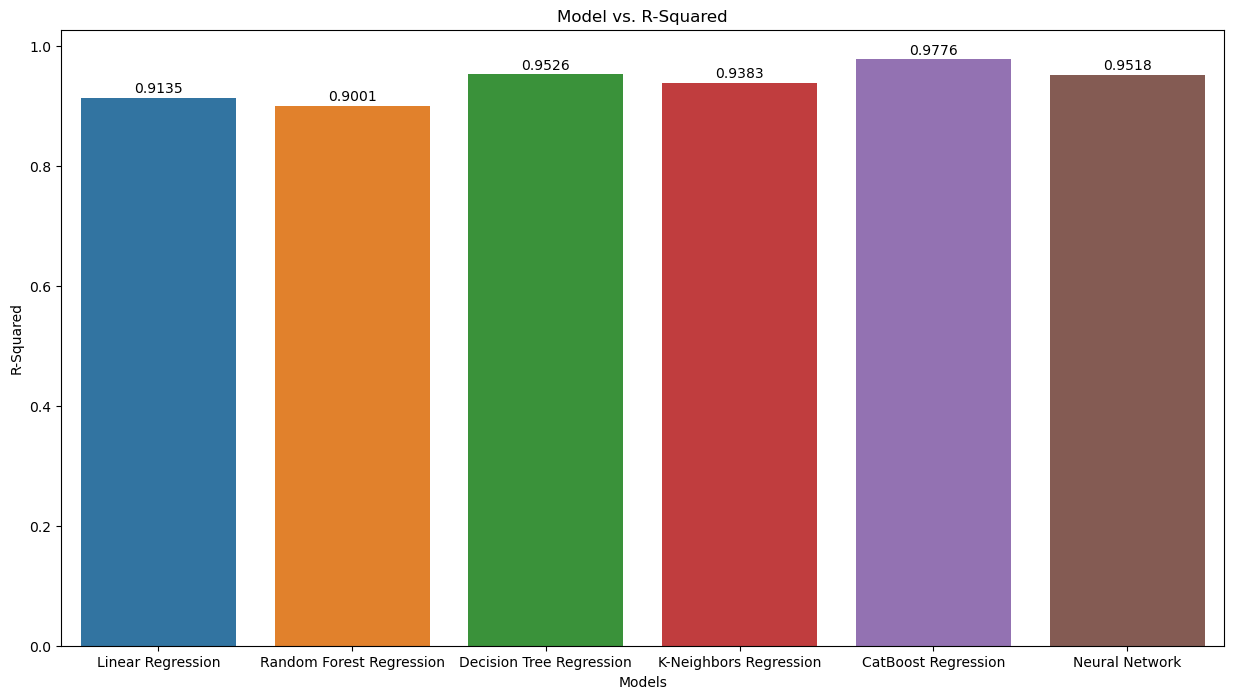

In [75]:
#Create bar graph to compare the R-squared by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(r2_dict.keys()), y = list(r2_dict.values()))

for p, value in zip(ax.patches, list(r2_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value:.4f}", ha = "center")

plt.xlabel("Models")
plt.ylabel("R-Squared")
plt.title("Model vs. R-Squared")

Text(0.5, 1.0, 'Model vs. MSE')

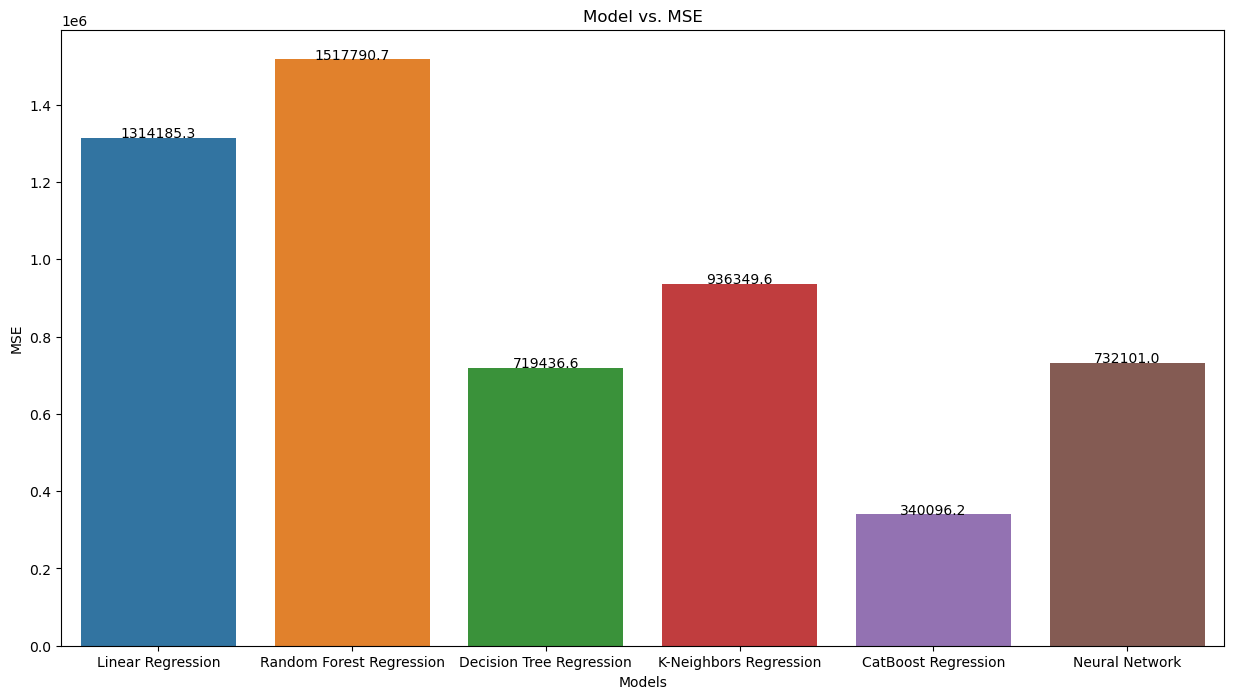

In [61]:
#Create bar graph to compare the MSE by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(mse_dict.keys()), y = list(mse_dict.values()))

for p, value in zip(ax.patches, list(mse_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value:.1f}", ha = "center")

plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("Model vs. MSE")

Text(0.5, 1.0, 'Model vs. MAE')

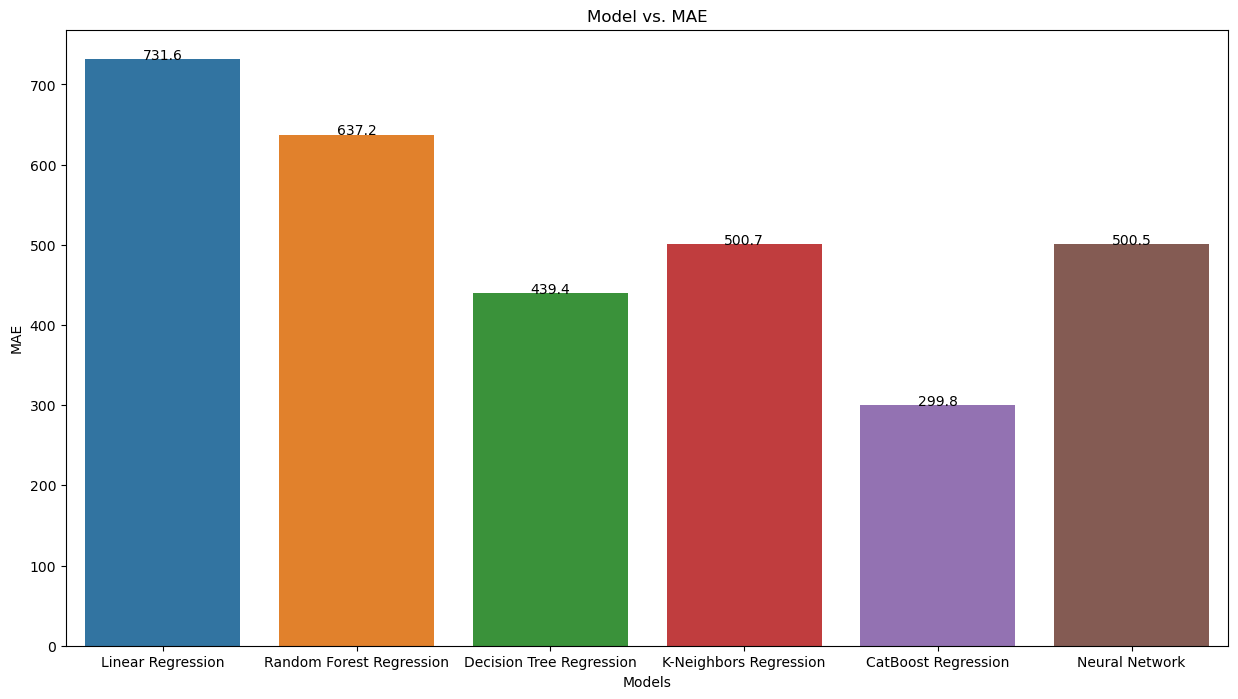

In [62]:
#Create bar graph to compare the MAE by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(mae_dict.keys()), y = list(mae_dict.values()))

for p, value in zip(ax.patches, list(mae_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value:.1f}", ha = "center")

plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Model vs. MAE")

Text(0.5, 1.0, 'Model vs. MAPE')

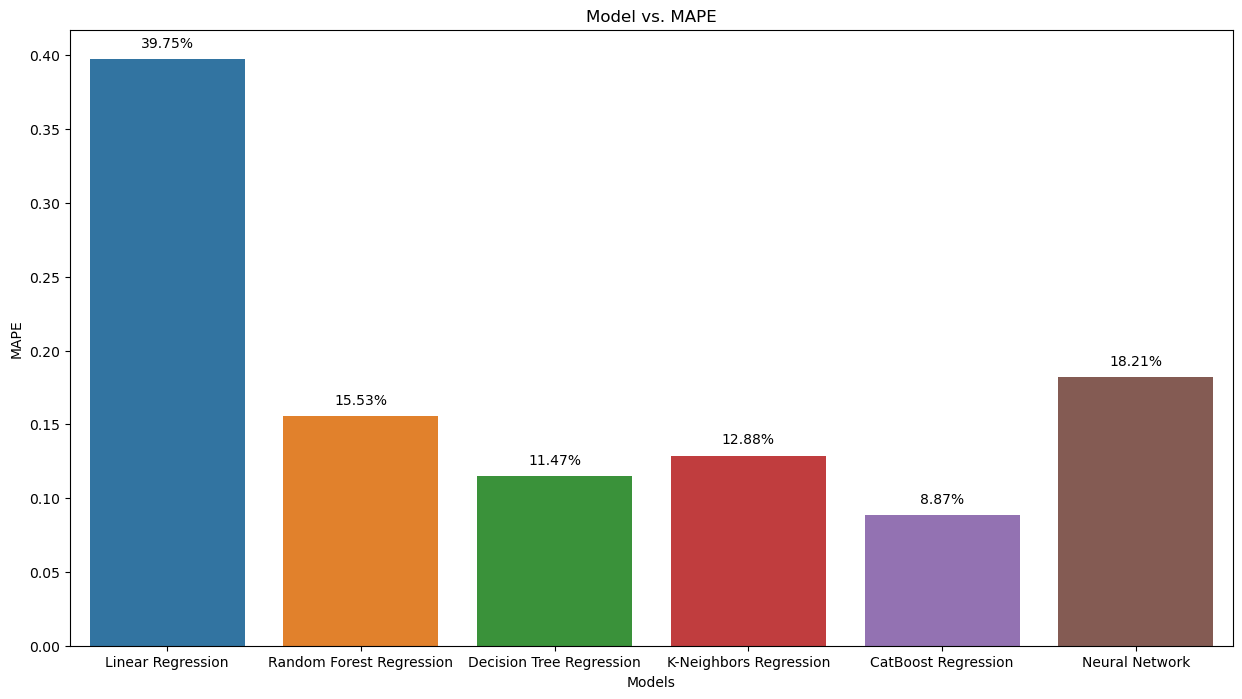

In [63]:
#Create bar graph to compare the MAPE by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(mape_dict.keys()), y = list(mape_dict.values()))

for p, value in zip(ax.patches, list(mape_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value*100:.2f}%", ha = "center")

plt.xlabel("Models")
plt.ylabel("MAPE")
plt.title("Model vs. MAPE")

Text(0.5, 1.0, 'Model vs. Cross Validation')

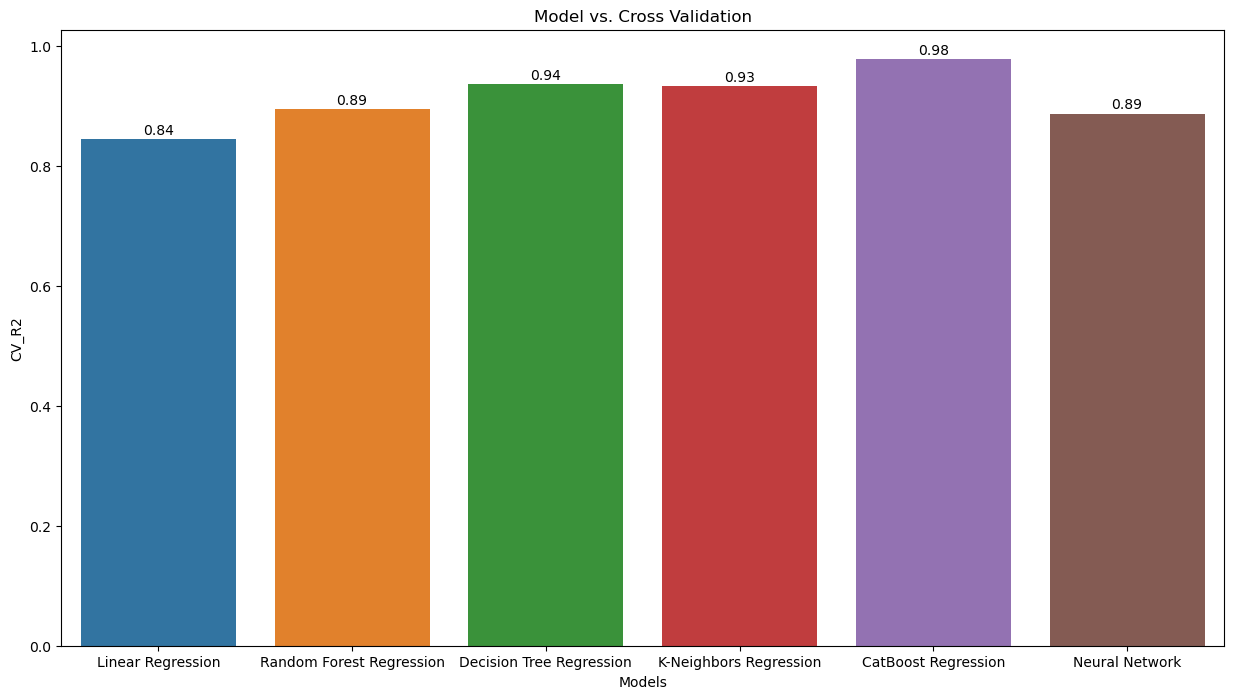

In [64]:
#Create bar graph to compare the Cross Valodation by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(cv_r2_dict.keys()), y = list(cv_r2_dict.values()))

for p, value in zip(ax.patches, list(cv_r2_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value:.2f}", ha = "center")

plt.xlabel("Models")
plt.ylabel("CV_R2")
plt.title("Model vs. Cross Validation")

In [65]:
listForModels = ["Linear Regression", "Random Forest Regression", "Decision Tree Regression", "K-Neighbors Regression", "CatBoost Regression","Neural Network"]
listForR2 = [r2LR, r2RF, r2DTR, r2KNR, r2CBR,r2NN]
listForMSE = [mseLR, mseRF, mseDTR, mseKNR, mseCBR,mseNN]
listForMAE = [maeLR, maeRF, maeDTR, maeKNR, maeCBR,maeNN]
listForMAPE = [mapeLR, mapeRF, mapeDTR, mapeKNR, mapeCBR,mapeNN]
listForcv_r2 = [cv_r2_LR, cv_r2_RF, cv_r2_DTR, cv_r2_KNR, cv_r2_CBR,cv_r2_NN]

# Create a DataFrame
df = pd.DataFrame({
    "Model Name": listForModels,
    "R-Squared": listForR2,
    "MSE": listForMSE,
    "MAE": listForMAE,
    "MAPE": listForMAPE,
    "Cross Validation R2": listForcv_r2
})

# Display the DataFrame
df

,Model Name,R-Squared,MSE,MAE,MAPE,Cross Validation R2
0,Linear Regression,0.913468,1.314185e+06,731.629808,0.397456,0.844584
1,Random Forest Regression,0.900062,1.517791e+06,637.244000,0.155313,0.894688
2,Decision Tree Regression,0.952629,7.194366e+05,439.415333,0.114703,0.937173
3,K-Neighbors Regression,0.938346,9.363496e+05,500.698133,0.128757,0.933225
4,CatBoost Regression,0.977607,3.400962e+05,299.812158,0.088723,0.978393
5,Neural Network,0.951795,7.321010e+05,500.486707,0.182065,0.887509


#### Reloading dataset1 for Association Rule

In [66]:
#Load & display diamond dataset

diamond_df = pd.read_csv('diamonds.csv')
#Drop 1st column of dataset, due to it's no. of row & unnamed column

diamond_df = diamond_df.drop('Unnamed: 0', axis = 1)

#Dropping dimentionless diamonds -- since its dimension is zero, there're faulty values.

diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

#Create new column for diamond size -- size

diamond_df['size'] = diamond_df['x'] * diamond_df['y'] * diamond_df['z'] 

In [67]:
#Create a list of column names excluding 'price'
columns_without_price = [col for col in diamond_df.columns if col != 'price']

#Rearrange columns to move 'price' to the last position
new_column_order = columns_without_price + ['price']

#Create a new DataFrame with columns arranged in the new order
diamond_df = diamond_df[new_column_order]

diamond_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,size,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,38.202030,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,34.505856,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,38.076885,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,46.724580,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,51.917250,335


In [68]:
#Copied the original dataset for use in association rule (need the dataset without any conversions)

diamond_df_ar = diamond_df.copy()

#### Secondary Dataset: Diamond Price with Time Series

In [65]:
#Load & display diamond price (time series dataset)

diamond_ts_df = pd.read_csv('diamonds_timeseries.csv')
diamond_ts_df.head()

,date,diamond price,inflation rate,interest rate,fed rate,gold price
0,2021-06-04,10385.16,2.40,-0.84,0.06,1890.97
1,2021-06-03,10385.16,2.42,-0.79,0.06,1871.36
2,2021-06-02,10378.43,2.44,-0.85,0.06,1907.75
3,2021-06-01,10376.10,2.46,-0.84,0.06,1900.49
4,2021-05-31,10368.67,2.46,-0.84,0.05,1905.74


In [66]:
#Display data type

diamond_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1134 non-null   object 
 1   diamond price   1134 non-null   float64
 2   inflation rate  1134 non-null   float64
 3   interest rate   1134 non-null   float64
 4   fed rate        1134 non-null   float64
 5   gold price      1134 non-null   float64
dtypes: float64(5), object(1)
memory usage: 53.3+ KB


In [67]:
#Display data describe

diamond_ts_df.describe()

,diamond price,inflation rate,interest rate,fed rate,gold price
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,10015.655705,1.805732,0.019356,1.259709,1538.054877
std,413.201619,0.344778,0.720946,0.987133,252.277353
min,9272.280000,0.500000,-1.080000,0.040000,1170.130000
25%,9766.007500,1.630000,-0.757500,0.090000,1292.850000
50%,10005.110000,1.780000,0.120000,1.580000,1502.150000
75%,10305.285000,2.100000,0.750000,2.190000,1775.502500
max,10804.857000,2.540000,1.170000,2.450000,2063.680000


In [68]:
#Copying it to another dataframe for visualizing
df_copy = diamond_ts_df.copy()

In [69]:
df_copy['date'] = pd.to_datetime(df_copy['date'])

#### Visualizing datasets to analyze pattern in time series dataset

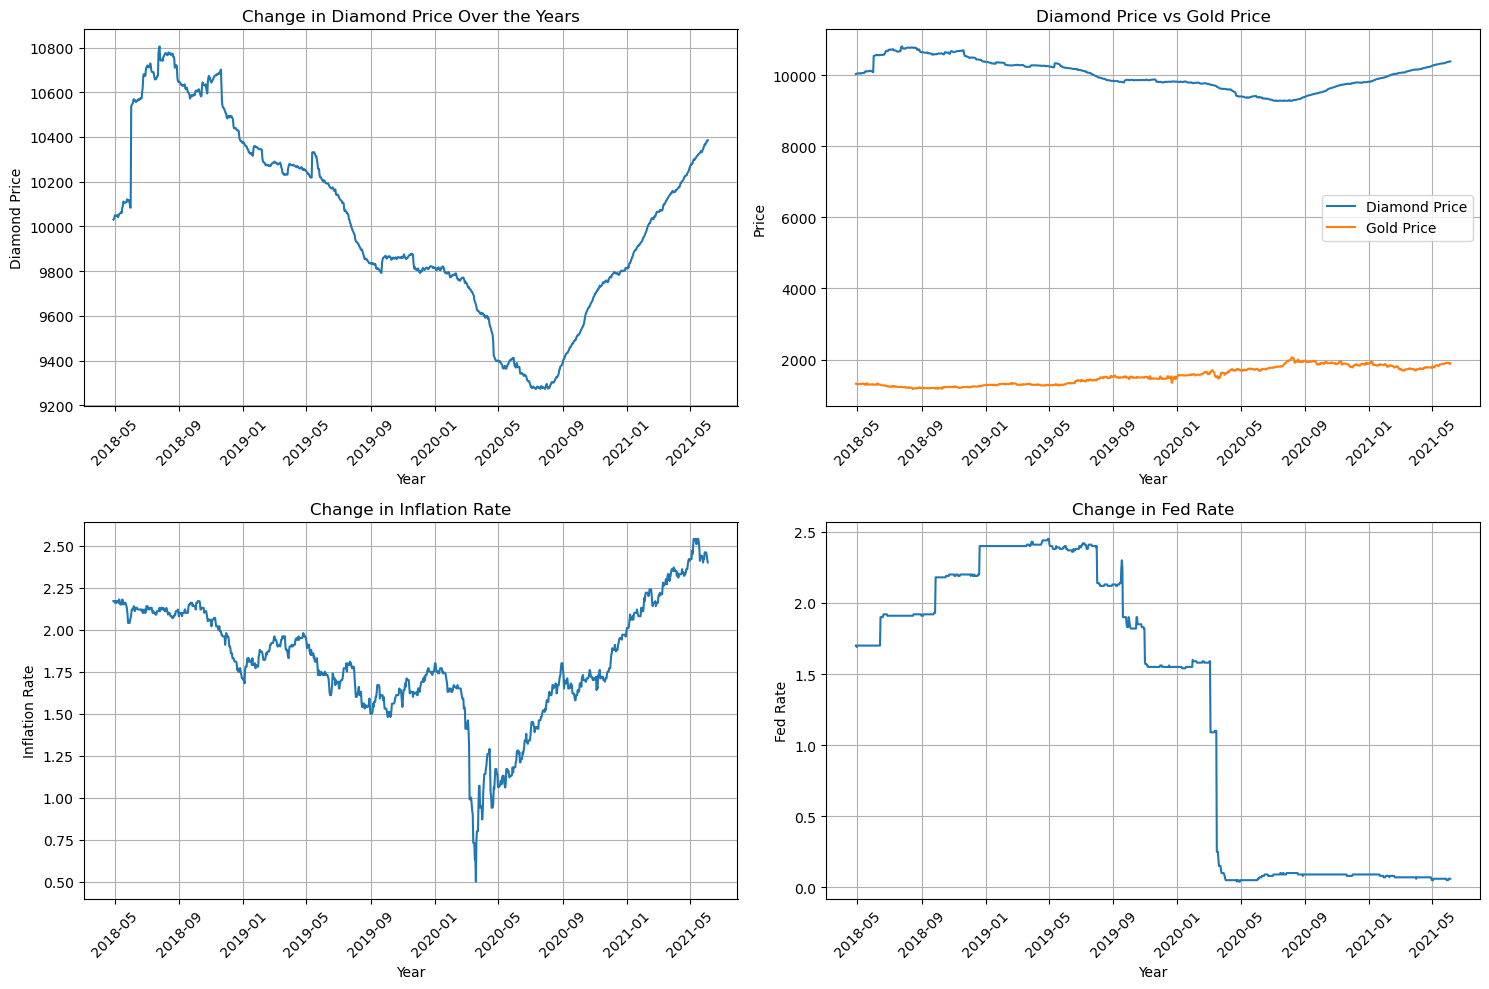

In [70]:
#Create subplots with 1 row and 4 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#Increase in diamond price over the years
axs[0, 0].plot(df_copy['date'], df_copy['diamond price'], linestyle='-')
axs[0, 0].set_title('Change in Diamond Price Over the Years')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Diamond Price')
axs[0, 0].grid(True)

#Increase in price of diamond vs gold to show relation
axs[0, 1].plot(df_copy['date'], df_copy['diamond price'], linestyle='-', label='Diamond Price')
axs[0, 1].plot(df_copy['date'], df_copy['gold price'], linestyle='-', label='Gold Price')
axs[0, 1].set_title('Diamond Price vs Gold Price')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Price')
axs[0, 1].legend()
axs[0, 1].grid(True)

#Increase in diamond price vs inflation rate
axs[1, 0].plot(df_copy['date'], df_copy['inflation rate'], linestyle='-')
axs[1, 0].set_title('Change in Inflation Rate')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Inflation Rate')
axs[1, 0].grid(True)

#Increase in diamond price vs fed rate
axs[1, 1].plot(df_copy['date'], df_copy['fed rate'], linestyle='-')
axs[1, 1].set_title('Change in Fed Rate')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Fed Rate')
axs[1, 1].grid(True)

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [71]:
#Copy dataset to display the correlation -- heatmap between diamond price and external factors

diamond_corr_df = diamond_ts_df.iloc[:, 1:].copy()
diamond_corr_df.head()

,diamond price,inflation rate,interest rate,fed rate,gold price
0,10385.16,2.40,-0.84,0.06,1890.97
1,10385.16,2.42,-0.79,0.06,1871.36
2,10378.43,2.44,-0.85,0.06,1907.75
3,10376.10,2.46,-0.84,0.06,1900.49
4,10368.67,2.46,-0.84,0.05,1905.74


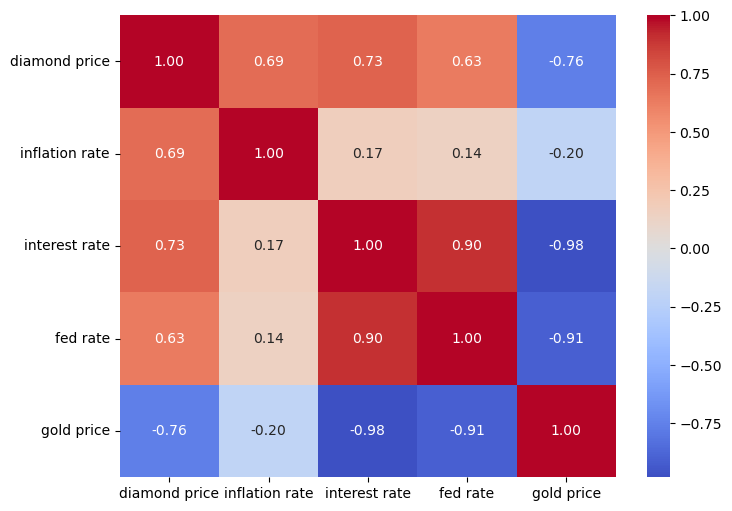

In [72]:
#Display correlation -- heatmap
corr = diamond_corr_df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", center = 0, ax = ax)
plt.show()

#### Model7: Association Rule on Primary Dataset

In [76]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#### Finding the best min_support value

In [77]:
#Transform the data into a transaction format
transactions = []
for _, row in diamond_df_ar.iterrows():
    transactions.append([str(row[i]) for i in range(len(row))])

#Convert transactions to a DataFrame
transactions_df = pd.DataFrame(transactions)

#Apply one-hot encoding to create a binary dataframe
binary_df = pd.get_dummies(transactions_df)

#Random only 5000 records for the model
binary_df = binary_df.sample(n=5000, random_state=42)

#Define a range of min_support values to try
min_support_values = [0.1, 0.05, 0.03, 0.02, 0.01, 0.005]

#Store the number of frequent itemsets for each min_support value
num_frequent_itemsets = []

#Iterate over each min_support value
for min_support in min_support_values:
    #Generate frequent itemsets using Apriori algorithm
    frequent_itemsets = apriori(binary_df, min_support = min_support, use_colnames = True)
    num_frequent_itemsets.append(len(frequent_itemsets))

#Print the number of frequent itemsets for each min_support value
for min_support, num_itemsets in zip(min_support_values, num_frequent_itemsets):
    print(f"Min Support: {min_support}, Number of Frequent Itemsets: {num_itemsets}")

Min Support: 0.1, Number of Frequent Itemsets: 19
Min Support: 0.05, Number of Frequent Itemsets: 44
Min Support: 0.03, Number of Frequent Itemsets: 111
Min Support: 0.02, Number of Frequent Itemsets: 192
Min Support: 0.01, Number of Frequent Itemsets: 411
Min Support: 0.005, Number of Frequent Itemsets: 1244


#### Trial 1 (min. support = 0.01 & min. threshold = 0.7)

In [78]:
#Generate frequent itemsets using Apriori algorithm

frequent_itemsets = apriori(binary_df, min_support = 0.01, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.0526,(0_0.3)
1,0.0410,(0_0.31)
2,0.0330,(0_0.32)
3,0.0216,(0_0.33)
4,0.0156,(0_0.34)
...,...,...
406,0.0106,"(5_57.0, 3_SI1, 1_Very Good)"
407,0.0120,"(5_58.0, 3_SI1, 1_Very Good)"
408,0.0100,"(5_57.0, 3_VS2, 1_Very Good)"
409,0.0102,"(5_57.0, 2_E, 3_SI1)"


In [80]:
#Generate association rules

rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.7)
rules.sort_values(by = ['lift', 'confidence', 'support'], ascending = False).drop(columns = ['antecedent support', 'consequent support', 'conviction']).head()

,antecedents,consequents,support,confidence,lift,leverage,zhangs_metric
2,(4_63.1),(1_Very Good),0.0126,0.759036,3.294428,0.008775,0.708213
12,"(3_VVS1, 5_56.0)",(1_Ideal),0.0132,0.814815,2.050364,0.006762,0.520717
10,"(3_VS2, 5_55.0)",(1_Ideal),0.0228,0.797203,2.006046,0.011434,0.516272
13,"(3_VVS2, 5_56.0)",(1_Ideal),0.0164,0.780952,1.965154,0.008055,0.501669
7,"(5_55.0, 2_G)",(1_Ideal),0.0186,0.756098,1.902611,0.008824,0.486371


In [81]:
#Evaluate the association rules
average_lift = rules['lift'].mean()
average_support = rules['support'].mean()
average_confidence = rules['confidence'].mean()

print("Average Lift:", average_lift)
print("Average Support:", average_support)
print("Average Confidence:", average_confidence)

Average Lift: 1.9791491946345225
Average Support: 0.025485714285714285
Average Confidence: 0.7472160736826988


#### Trial 2 (min. support = 0.005 & min. threshold = 0.7)

In [82]:
#Generate frequent itemsets using Apriori algorithm

frequent_itemsets = apriori(binary_df, min_support = 0.005, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.0064,(0_0.24)
1,0.0526,(0_0.3)
2,0.0410,(0_0.31)
3,0.0330,(0_0.32)
4,0.0216,(0_0.33)
...,...,...
1239,0.0060,"(5_55.0, 3_VS2, 2_F, 1_Ideal)"
1240,0.0052,"(5_57.0, 3_VS2, 2_F, 1_Ideal)"
1241,0.0072,"(1_Ideal, 3_VS2, 5_56.0, 2_G)"
1242,0.0052,"(1_Premium, 5_58.0, 3_VS2, 2_F)"


In [83]:
#Generate association rules

rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.7)
rules.sort_values(by = ['lift', 'confidence', 'support'], ascending = False).drop(columns = ['antecedent support', 'consequent support', 'conviction']).head()

,antecedents,consequents,support,confidence,lift,leverage,zhangs_metric
18,"(8_2.7, 1_Ideal)",(0_0.31),0.0058,0.743590,18.136335,0.005480,0.952290
1,(7_4.28),(0_0.3),0.0058,0.805556,15.314744,0.005421,0.941482
2,(7_4.32),(0_0.3),0.0054,0.729730,13.873189,0.005011,0.934836
3,(8_2.66),(0_0.3),0.0086,0.728814,13.855771,0.007979,0.938907
0,(6_4.3),(0_0.3),0.0050,0.714286,13.579576,0.004632,0.932890


In [84]:
#Evaluate the association rules
average_lift = rules['lift'].mean()
average_support = rules['support'].mean()
average_confidence = rules['confidence'].mean()

print("Average Lift:", average_lift)
print("Average Support:", average_support)
print("Average Confidence:", average_confidence)

Average Lift: 3.2442105368982803
Average Support: 0.009874999999999998
Average Confidence: 0.796867889230777


#### Model8: K-Mean Clustering Modeling on Primary Dataset

In [85]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [86]:
#Split the data into training and validation sets
train_df, valid_df = train_test_split(train_subset, test_size = 0.2, random_state = 42)

In [87]:
train_df_norm = train_df.apply(preprocessing.scale, axis = 0)
valid_df_norm = valid_df.apply(preprocessing.scale, axis = 0)

In [ ]:
inertia = []
k_values = range(1, 15)
for n_clusters in k_values:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(train_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': k_values, 'inertia': inertia})

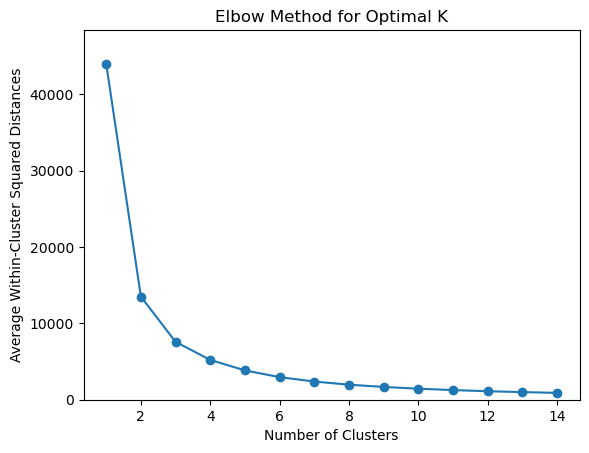

In [95]:
#Plot the inertia as a function of the number of clusters
plt.plot(k_values, inertia, marker ='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.ylim((0, 1.1 * inertias.inertia.max()))

#ax.legend().set_visible(False)
plt.show()

#### Trial 1 (n_cluster = 10)

In [96]:
#Perform KMeans clustering

kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(train_df_norm)

KMeans(n_clusters=10, random_state=42)

In [97]:
#Assign clusters to data points in both training and validation sets
train_cluster_labels = kmeans.predict(train_df_norm)
valid_cluster_labels = kmeans.predict(valid_df_norm)

In [98]:
#Add cluster labels to the dataframes
train_df['cluster'] = train_cluster_labels
valid_df['cluster'] = valid_cluster_labels

In [99]:
from sklearn.metrics import silhouette_score

#Compute silhouette score for training set
train_silhouette_score = silhouette_score(train_df_norm, train_cluster_labels)
print("Training set silhouette score:", train_silhouette_score)

#Compute silhouette score for validation set
valid_silhouette_score = silhouette_score(valid_df_norm, valid_cluster_labels)
print("Validation set silhouette score:", valid_silhouette_score)

Training set silhouette score: 0.17264730114510038
Validation set silhouette score: 0.16589257872906354


#### Trial 2 (n_cluster = 5)

In [100]:
#Perform KMeans clustering

kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(train_df_norm)

KMeans(n_clusters=5, random_state=42)

In [101]:
#Assign clusters to data points in both training and validation sets
train_cluster_labels = kmeans.predict(train_df_norm)
valid_cluster_labels = kmeans.predict(valid_df_norm)

In [102]:
#Add cluster labels to the dataframes
train_df['cluster'] = train_cluster_labels
valid_df['cluster'] = valid_cluster_labels

In [103]:
from sklearn.metrics import silhouette_score

#Compute silhouette score for training set
train_silhouette_score = silhouette_score(train_df_norm, train_cluster_labels)
print("Training set silhouette score:", train_silhouette_score)

#Compute silhouette score for validation set
valid_silhouette_score = silhouette_score(valid_df_norm, valid_cluster_labels)
print("Validation set silhouette score:", valid_silhouette_score)

Training set silhouette score: 0.23323410642260625
Validation set silhouette score: 0.240256917333898


#### Model9: Regression Based Forecasting on Secondary Dataset

In [104]:
#Display diamond price (time series dataset)

diamond_ts_df = pd.read_csv('diamonds_timeseries.csv')
diamond_ts_df.head()

,date,diamond price,inflation rate,interest rate,fed rate,gold price
0,2021-06-04,10385.16,2.40,-0.84,0.06,1890.97
1,2021-06-03,10385.16,2.42,-0.79,0.06,1871.36
2,2021-06-02,10378.43,2.44,-0.85,0.06,1907.75
3,2021-06-01,10376.10,2.46,-0.84,0.06,1900.49
4,2021-05-31,10368.67,2.46,-0.84,0.05,1905.74


In [105]:
#Converting the 'date' Column to Datetime
diamond_ts_df['date'] = pd.to_datetime(diamond_ts_df.date, format = '%Y-%m-%d')

#Creating a Time Series from the DataFrame
diamond_ts = pd.Series(diamond_ts_df['diamond price'].values, index = diamond_ts_df.date)

#### Linear

In [106]:
#Fit a linear trend model to the time series - whole dataset

diamond_ts_df = tsatools.add_trend(diamond_ts, trend = 'ct')
diamond_lm = sm.ols(formula = 'diamond_ts ~ trend', data = diamond_ts_df).fit()

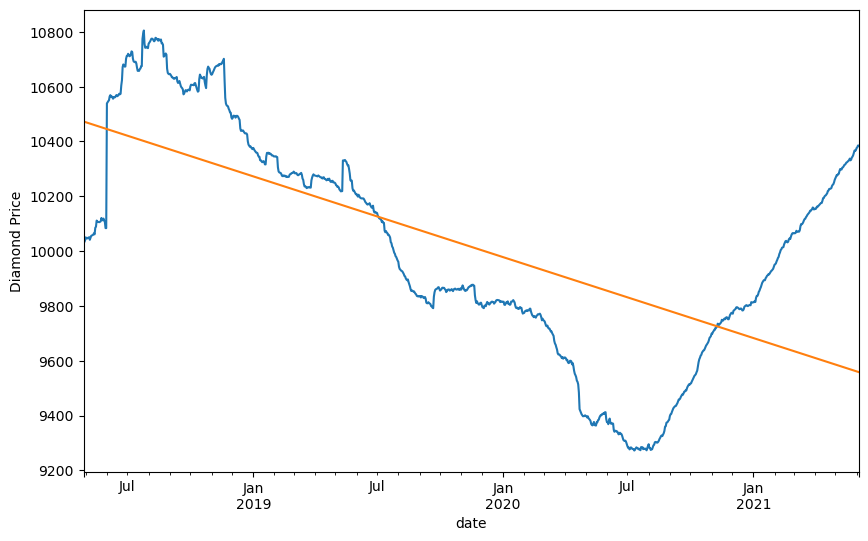

In [107]:
#Plot the time series - whole dataset
plt.figure(figsize = (10, 6))

ax = diamond_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Diamond Price')

diamond_lm.predict(diamond_ts_df).plot(ax = ax)
plt.show()

In [108]:
#Change column name
diamond_ts_df.rename(columns = {'const': 'intercept'}, inplace = True)

#Display dataframe
diamond_ts_df.head()

,0,intercept,trend
date,,,
2021-06-04,10385.16,1.0,1.0
2021-06-03,10385.16,1.0,2.0
2021-06-02,10378.43,1.0,3.0
2021-06-01,10376.10,1.0,4.0
2021-05-31,10368.67,1.0,5.0


#### Data Partition

In [109]:
#Split the time series into train (80%) and test sets (20%) without randomly

test_size = 0.2
train_end_index = int(len(diamond_ts) * test_size)

testset_ts = diamond_ts[:train_end_index]
trainset_ts = diamond_ts[train_end_index:]

In [110]:
#Fit a linear trend model to the time series - Train dataset

train_df = tsatools.add_trend(trainset_ts, trend = 'ct')
train_df.rename(columns = {'const': 'intercept'}, inplace = True)

diamond_lm = sm.ols(formula = 'diamond_ts ~ trend', data = diamond_ts_df).fit()

In [111]:
#Fit a linear trend model to the time series - Test dataset

test_df = tsatools.add_trend(testset_ts, trend = 'ct')
test_df.rename(columns = {'const': 'intercept'}, inplace = True)

In [112]:
#Display Train dataframe

train_df.head()

,0,intercept,trend
date,,,
2020-10-21,9637.96,1.0,1.0
2020-10-20,9637.25,1.0,2.0
2020-10-19,9633.21,1.0,3.0
2020-10-18,9629.62,1.0,4.0
2020-10-17,9621.39,1.0,5.0


In [113]:
#Display Test dataframe

test_df.head()

,0,intercept,trend
date,,,
2021-06-04,10385.16,1.0,1.0
2021-06-03,10385.16,1.0,2.0
2021-06-02,10378.43,1.0,3.0
2021-06-01,10376.10,1.0,4.0
2021-05-31,10368.67,1.0,5.0


In [114]:
#Make predictions on Train & Test Dataset

train_predictions = diamond_lm.predict(train_df)
test_predictions = diamond_lm.predict(test_df)

In [115]:
#Model Performance -- Train dataset

train_residuals = trainset_ts - train_predictions
train_rmse = np.sqrt(np.mean(train_residuals ** 2))
train_mae = np.mean(np.abs(train_residuals))
train_mse = np.mean(train_residuals ** 2)
train_r2 = diamond_lm.rsquared

print("Train Dataset Performance:")
print("Root Mean Squared Error (RMSE):", train_rmse)
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("R-squared (R2):", train_r2)

Train Dataset Performance:
Root Mean Squared Error (RMSE): 281.29808192964634
Mean Absolute Error (MAE): 227.97404135640113
Mean Squared Error (MSE): 79128.61089729803
R-squared (R2): 0.4089214547240403


In [116]:
#Model Performance -- Test dataset

test_residuals = testset_ts - test_predictions
test_rmse = np.sqrt(np.mean(test_residuals ** 2))
test_mae = np.mean(np.abs(test_residuals))
test_mse = np.mean(test_residuals ** 2)
test_r2 = diamond_lm.rsquared

print("\nTest Dataset Performance:")
print("Root Mean Squared Error (RMSE):", test_rmse)
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("R-squared (R2):", test_r2)


Test Dataset Performance:
Root Mean Squared Error (RMSE): 440.2834341747109
Mean Absolute Error (MAE): 357.8046791854155
Mean Squared Error (MSE): 193849.502408677
R-squared (R2): 0.4089214547240403


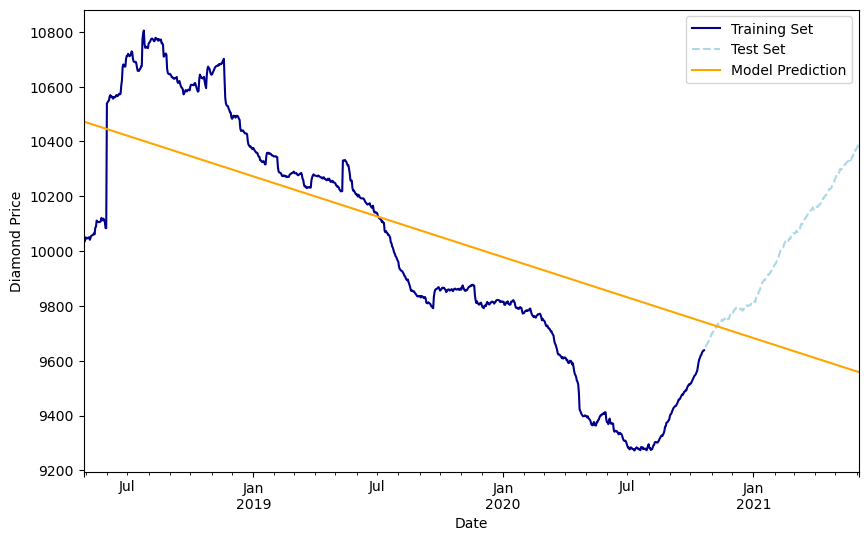

In [117]:
#Generate predictions using the same DataFrame structure
predictions = diamond_lm.predict(diamond_ts_df)

#Plot the time series
plt.figure(figsize = (10, 6))

ax = trainset_ts.plot(color = 'darkblue', label = 'Training Set')
testset_ts.plot(ax = ax, color = 'lightblue', linestyle = '--', label = 'Test Set')

#Model Prediction
predictions.plot(ax=ax, color='orange', label='Model Prediction')

ax.set_xlabel('Date')
ax.set_ylabel('Diamond Price')
ax.legend()
plt.show()

#### Exponential

In [118]:
#Apply logarithmic transformation to time series
log_diamond_ts = np.log(diamond_ts)

In [119]:
#Create trend variables
trend = np.arange(1, len(log_diamond_ts) + 1)
trend_squared = trend ** 2

In [120]:
#Fit an exponential trend model
diamond_ts_df['log_diamond_ts'] = log_diamond_ts
diamond_ts_df['trend'] = trend
diamond_ts_df['trend_squared'] = trend_squared

In [121]:
diamond_ts_df.head()

,0,intercept,trend,log_diamond_ts,trend_squared
date,,,,,
2021-06-04,10385.16,1.0,1,9.248133,1
2021-06-03,10385.16,1.0,2,9.248133,4
2021-06-02,10378.43,1.0,3,9.247485,9
2021-06-01,10376.10,1.0,4,9.247260,16
2021-05-31,10368.67,1.0,5,9.246544,25


In [122]:
#Fit the model with logarithmic transformations
diamond_exp_lm = sm.ols(formula='log_diamond_ts ~ trend + trend_squared', data=diamond_ts_df).fit()

In [123]:
#For predictions, simply use the model's predict method
diamond_ts_df['exp_predicted'] = diamond_exp_lm.predict(diamond_ts_df[['trend', 'trend_squared']])

In [124]:
#Model Performance -- Test dataset

exp_test_residuals = testset_ts - diamond_ts_df['exp_predicted']

exp_test_mse = np.mean(exp_test_residuals ** 2)
exp_test_rmse = np.sqrt(exp_test_mse)
exp_test_mae = np.mean(np.abs(exp_test_residuals))
exp_test_r2 = diamond_exp_lm.rsquared

print("\nTest Dataset Performance:")
print("Root Mean Squared Error (RMSE):", exp_test_rmse)
print("Mean Absolute Error (MAE):", exp_test_mae)
print("Mean Squared Error (MSE):", exp_test_mse)
print("R-squared (R2):", exp_test_r2)


Test Dataset Performance:
Root Mean Squared Error (RMSE): 9992.758897632593
Mean Absolute Error (MAE): 9990.460876556228
Mean Squared Error (MSE): 99855230.38621536
R-squared (R2): 0.6466133279619017


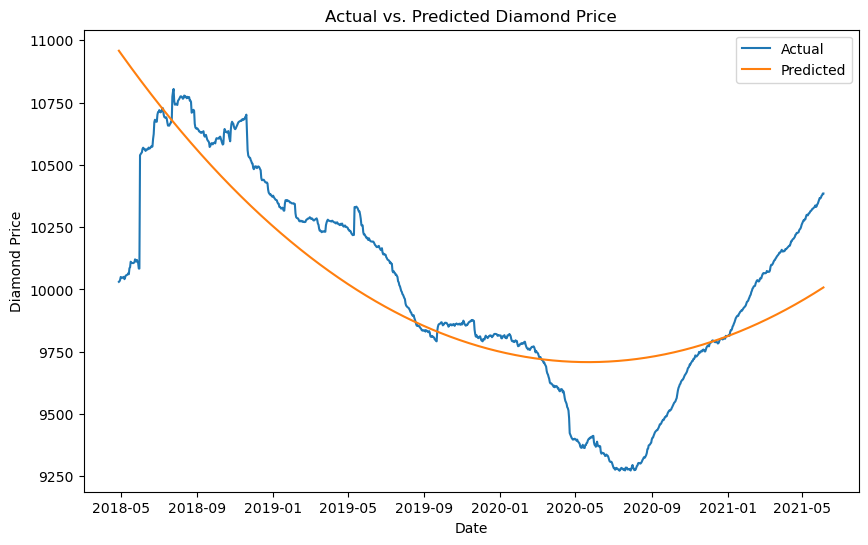

In [125]:
#Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))

plt.plot(diamond_ts, label='Actual')
plt.plot(np.exp(diamond_ts_df['exp_predicted']), label='Predicted')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Diamond Price')
plt.title('Actual vs. Predicted Diamond Price')
plt.legend()

# Display the plot
plt.show()

#### Model10: LSTM Neural Network Modeling on Secondary Dataset

In [126]:
#Load & display diamond price (time series dataset)

diamond_hist_df = pd.read_csv('diamonds_timeseries.csv')
diamond_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1134 non-null   object 
 1   diamond price   1134 non-null   float64
 2   inflation rate  1134 non-null   float64
 3   interest rate   1134 non-null   float64
 4   fed rate        1134 non-null   float64
 5   gold price      1134 non-null   float64
dtypes: float64(5), object(1)
memory usage: 53.3+ KB


In [127]:
#Multivariate multi-step encoder-decoder lstm

#Split a univariate dataset into train (70%)/test sets (30%)
def split_dataset(diamond_hist_df):
    #Split into standard weeks
    train, test = diamond_hist_df[1:-328], diamond_hist_df[-328:-6]

    #Restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

In [128]:
#Evaluate one or more weekly forecasts against expected values

def evaluate_forecasts(actual, predicted):
    scores = list()
    
    #Calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        rmse = sqrt(mse)
        scores.append(rmse)
        
    #Calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s/(actual.shape[0] * actual.shape[1]))
    return score, scores

In [129]:
#Summarize scores

def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

In [130]:
#Convert history into inputs and outputs

def to_supervised(train, n_input, n_out = 7):
    
    #Flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0

    #Step over the entire history one time step at a time
    for _ in range(len(data)):
    
    #Define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        
        #Ensure we have enough data for this instance
        if out_end <= len(data):
            X.append(data[in_start:in_end, :])
            y.append(data[in_end:out_end, 0])
        
        #Move along one time step
        in_start += 1
    return array(X), array(y)

In [131]:
#Train the model

def build_model(train, n_input):
    train_x, train_y = to_supervised(train, n_input)
    verbose, epochs, batch_size = 1, 50, 16
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]

    #Reshape output into [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))

    #Define model
    model = Sequential()
    model.add(LSTM(200, activation = 'relu', input_shape = (n_timesteps, n_features)))
    model.add(RepeatVector(n_outputs))
    model.add(LSTM(200, activation = 'relu', return_sequences = True))
    model.add(TimeDistributed(Dense(100, activation = 'relu')))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss = 'mse', optimizer = 'adam')

    model.fit(train_x, train_y, epochs = epochs, batch_size = batch_size, verbose = verbose)
    return model

In [132]:
#Make a forecast

def forecast(model, history, n_input):
    data = array(history)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    input_x = data[-n_input:, :]
    input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
    
    #Forecast next week
    yhat = model.predict(input_x, verbose = 1)
    yhat = yhat[0]
    return yhat

In [133]:
#Evaluate a single model

def evaluate_model(train, test, n_input):
    model = build_model(train, n_input)
    history = [x for x in train]
    
    predictions = list()
    for i in range(len(test)):
        yhat_sequence = forecast(model, history, n_input)
        predictions.append(yhat_sequence)
        history.append(test[i, :])
    predictions = array(predictions)
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores, predictions

In [134]:
#Load & display diamond price (time series dataset)

diamond_hist_df = pd.read_csv('diamonds_timeseries.csv', header = 0)
diamond_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1134 non-null   object 
 1   diamond price   1134 non-null   float64
 2   inflation rate  1134 non-null   float64
 3   interest rate   1134 non-null   float64
 4   fed rate        1134 non-null   float64
 5   gold price      1134 non-null   float64
dtypes: float64(5), object(1)
memory usage: 53.3+ KB


In [135]:
#Date as index

diamond_hist_df["date"] = pd.to_datetime(diamond_hist_df["date"])
diamond_hist_df = diamond_hist_df.set_index('date')

diamond_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 2021-06-04 to 2018-04-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diamond price   1134 non-null   float64
 1   inflation rate  1134 non-null   float64
 2   interest rate   1134 non-null   float64
 3   fed rate        1134 non-null   float64
 4   gold price      1134 non-null   float64
dtypes: float64(5)
memory usage: 53.2 KB


In [136]:
#Split into train and test

train, test = split_dataset(diamond_hist_df.values)

In [137]:
#Valuate model and get scores

n_input = 15
score, scores, predictions = evaluate_model(train, test, n_input)

#Summarize scores RMSE
summarize_scores('LSTM RMSE', score, scores)

Epoch 1/50
49/49 [==============================] - 1s 11ms/step - loss: 24968260.0000
Epoch 2/50
49/49 [==============================] - 1s 11ms/step - loss: 10723538.0000
Epoch 3/50
49/49 [==============================] - 1s 11ms/step - loss: 4354574.5000
Epoch 4/50
49/49 [==============================] - 1s 12ms/step - loss: 3299626.0000
Epoch 5/50
49/49 [==============================] - 1s 11ms/step - loss: 2405407.7500
Epoch 6/50
49/49 [==============================] - 1s 11ms/step - loss: 148355.6562
Epoch 7/50
49/49 [==============================] - 1s 11ms/step - loss: 112254.8984
Epoch 8/50
49/49 [==============================] - 1s 11ms/step - loss: 88184.2031
Epoch 9/50
49/49 [==============================] - 1s 11ms/step - loss: 72195.2344
Epoch 10/50
49/49 [==============================] - 1s 11ms/step - loss: 49712.5664
Epoch 11/50
49/49 [==============================] - 1s 11ms/step - loss: 37221.0391
Epoch 12/50
49/49 [==============================] - 1s 11ms

In [138]:
#Display predictions

prediction = predictions.mean(axis = 0)
print(prediction)

[[10389.673]
 [10478.902]
 [10438.796]
 [10438.668]
 [10400.416]
 [10393.346]
 [10372.481]]


In [139]:
#Load the dataset

diamond_hist_df = pd.read_csv('diamonds_timeseries.csv', header = 0)

date_actual = diamond_hist_df['date'].iloc[0]

date_future = []
for i in range(1, 8):
    date_future.append(date_actual + str(timedelta(i)))

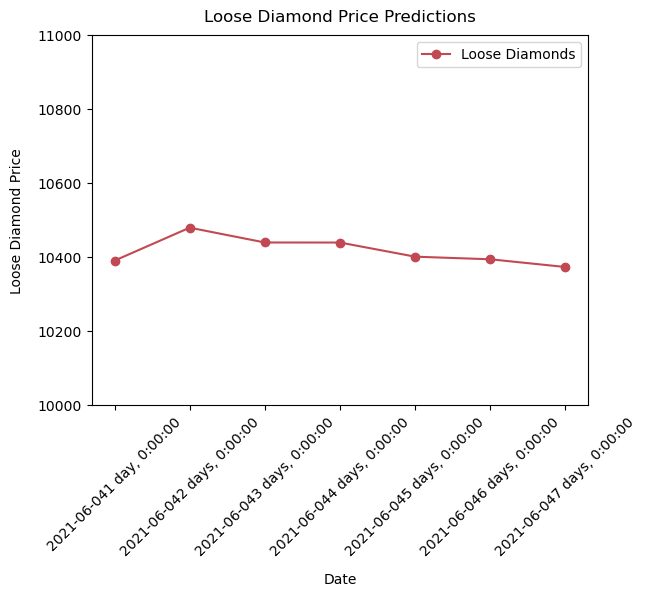

In [140]:
#Plot the predictions

plt.plot(date_future, prediction.tolist(), color = '#c14953', marker = 'o', label = 'Loose Diamonds')
plt.title('Loose Diamond Price Predictions', pad = 10)
plt.xlabel('Date', labelpad = 10)
plt.ylabel('Loose Diamond Price', labelpad = 10)
plt.axis(ymin = 10000, ymax = 11000)
plt.xticks(rotation = 45)
plt.legend(loc = 'best')
plt.show()

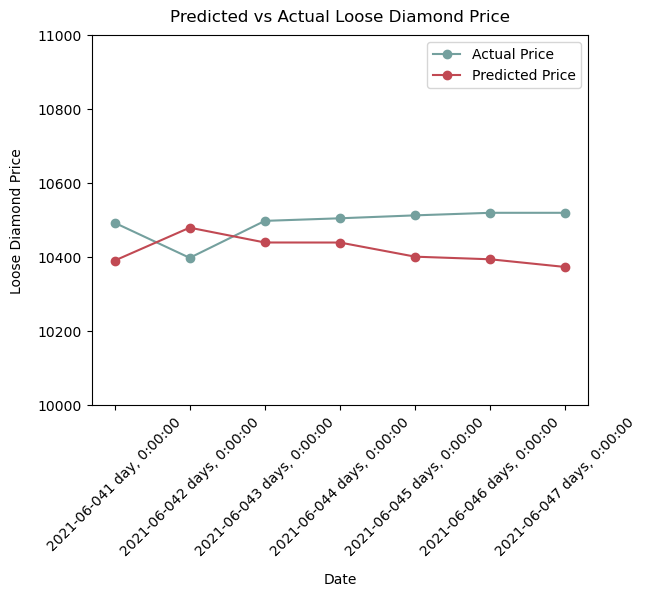

In [141]:
#Plot the predictions compare with actual future prices on investing.com

actual = [10492.26, 10397.22, 10497.28, 10504.28, 10512.21, 10519.12, 10519.12]

plt.plot(date_future, actual, color = '#74a09e', marker = 'o', label = 'Actual Price')
plt.plot(date_future, prediction.tolist(), color = '#c14953', marker = 'o', label = 'Predicted Price')
plt.title('Predicted vs Actual Loose Diamond Price', pad = 10)
plt.xlabel('Date', labelpad = 10)
plt.ylabel('Loose Diamond Price', labelpad = 10)
plt.axis(ymin = 10000, ymax = 11000)
plt.xticks(rotation = 45)
plt.legend(loc = 'upper right')
plt.show()

In [142]:
#Linear Regression
     
X = diamond_hist_df[['inflation rate', 'interest rate', 'fed rate', 'gold price']]
y = diamond_hist_df['diamond price']    

X_train = X[7:]
X_test = X[:7]
y_train = y[7:]
y_test = y[:7]

#Create Classifier
clf = LinearRegression()

#Train the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)

#RMSE linear regression (last week)
RMSE_linear = mean_squared_error(y_test, y_pred, squared=False) #False = RMSE

print("RMSE linear regression: ", RMSE_linear)

[10020.74540134 10060.61860091 10024.83957034 10047.67290975
 10041.62877121 10036.99059618 10036.99059618]
RMSE linear regression:  337.02747335124684


In [143]:
#RMSE LSTM

#RMSE LSTM - last week
summarize_scores('RMSE LSTM (last week)', score, scores)

#RMSE LSTM - future week
RMSE_lstm_future = mean_squared_error(actual, prediction, squared=False) #False = RMSE
print("RMSE LSTM (future week): ", RMSE_lstm_future)

RMSE LSTM (last week): [150.883] 170.7, 125.3, 142.9, 133.6, 157.9, 153.2, 166.8
RMSE LSTM (future week):  103.33122298361882


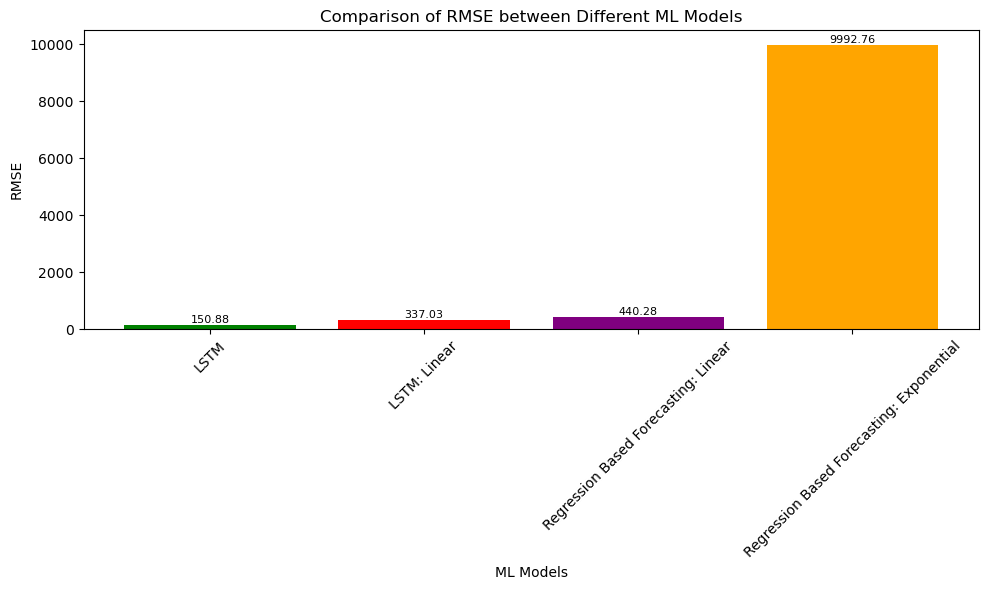

In [145]:
#Compare RMSE between ML models

#RMSE values
methods = ['Regression Based Forecasting: Linear', 'Regression Based Forecasting: Exponential', 'LSTM: Linear', 'LSTM']
rmse_values = [440.2834, 9992.7589, 337.0275, 150.8830]

#Sort methods and rmse_values based on RMSE values in descending order
sorted_data = sorted(zip(methods, rmse_values), key=lambda x: x[1])
methods_sorted, rmse_values_sorted = zip(*sorted_data)

#Create bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(methods_sorted, rmse_values_sorted, color=['green', 'red', 'purple', 'orange'])
plt.xlabel('ML Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE between Different ML Models')
plt.xticks(rotation=45)

#Add RMSE values on each bar
for bar, value in zip(bars, rmse_values_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()